## INFS3208 - Individual Project

# Data Analysis of Formula 1 World Championship (1950 - 2024)

# Background for this project

#### 1) F1 teams need to change their drivers.

#### 2) F1 teams have to find methods to improve the skills of their existing drivers.

#### 3) For this teams have to analyse the driver’s performance based on various parameters.

#### E.g. The results provided by the driver, race pace maintained by the driver, pace during qualifying, reasons for not finishing the race, etc.

# Description of the dataset

#### 1) Dataset name - Formula 1 World Championship (1950 - 2024)

#### 2) It is obtained from Kaggle

#### 3) It consists of 14 CSV files

#### 4) Link to the dataset - https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv

# Project Architecture

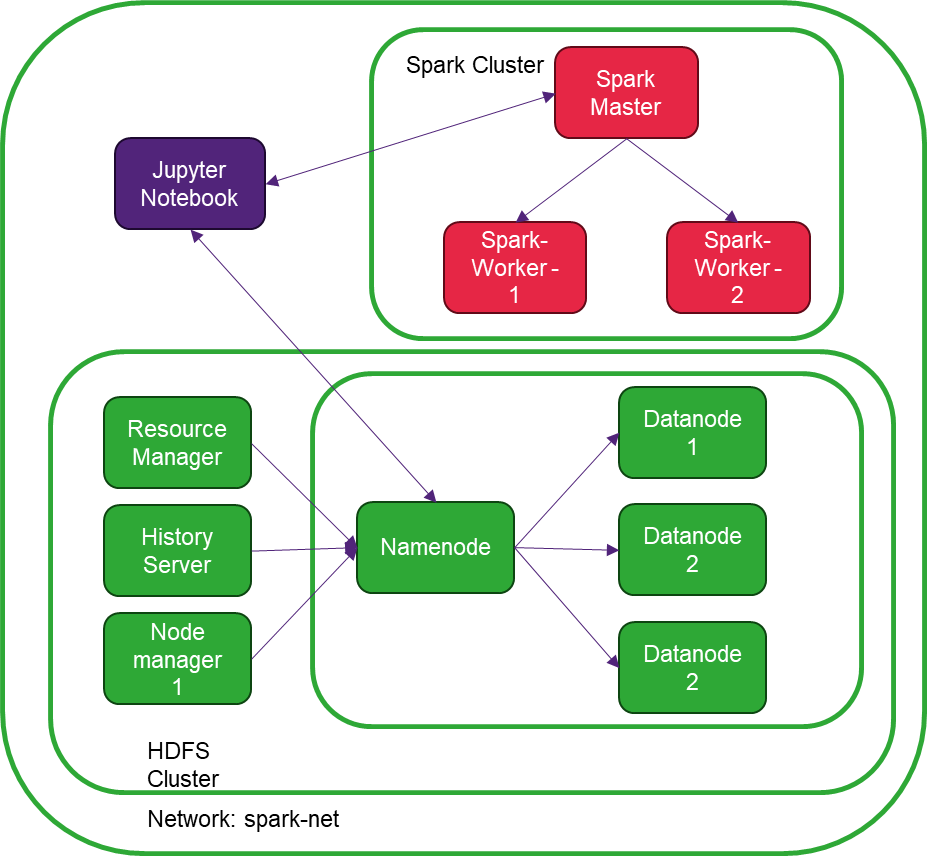

# Data Loading

In [1]:
# Required libraries

from pyspark.sql import SparkSession
from pyspark.sql.functions import concat_ws, col
from pyspark import SparkContext
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc
from pyspark.sql.functions import concat_ws

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Creating a spark session

spark = SparkSession.builder \
    .appName("Selecting F1 Drivers") \
    .master("spark://spark-master:7077") \
    .getOrCreate()

In [3]:
# Data location in Local File System

circuits_dir = 'data/circuits.csv'
drivers_dir = 'data/drivers.csv'
driver_stand_dir = 'data/driver_standings.csv'
cons_results_dir = 'data/constructor_results.csv'
cons_stand_dir = 'data/constructor_standings.csv'
cons_dir = 'data/constructors.csv'
lap_times_dir = 'data/lap_times.csv'
pit_stops_dir = 'data/pit_stops.csv'
quali_dir = 'data/qualifying.csv'
races_dir = 'data/races.csv'
results_dir = 'data/results.csv'
seasons_dir = 'data/seasons.csv'
sprint_dir = 'data/sprint_results.csv'
status_dir = 'data/status.csv'

In [4]:
# Data location in HDFS

hdfs_circuits_dir = 'hdfs://namenode:9000/data/circuits.csv'
hdfs_drivers_dir = 'hdfs://namenode:9000/data/drivers.csv'
hdfs_driver_stand_dir = 'hdfs://namenode:9000/data/driver_standings.csv'
hdfs_cons_results_dir = 'hdfs://namenode:9000/data/constructor_results.csv'
hdfs_cons_stand_dir = 'hdfs://namenode:9000/data/constructor_standings.csv'
hdfs_cons_dir = 'hdfs://namenode:9000/data/constructors.csv'
hdfs_lap_times_dir = 'hdfs://namenode:9000/data/lap_times.csv'
hdfs_pit_stops_dir = 'hdfs://namenode:9000/data/pit_stops.csv'
hdfs_quali_dir = 'hdfs://namenode:9000/data/qualifying.csv'
hdfs_races_dir = 'hdfs://namenode:9000/data/races.csv'
hdfs_results_dir = 'hdfs://namenode:9000/data/results.csv'
hdfs_seasons_dir = 'hdfs://namenode:9000/data/seasons.csv'
hdfs_sprint_dir = 'hdfs://namenode:9000/data/sprint_results.csv'
hdfs_status_dir = 'hdfs://namenode:9000/data/status.csv'

In [5]:
# Loading data

try:
    circuit_data = spark.read.csv(hdfs_circuits_dir, header=True, inferSchema=True, multiLine=True)
    drivers_data = spark.read.csv(hdfs_drivers_dir, header=True, inferSchema=True, multiLine=True)
    driver_stand_data = spark.read.csv(hdfs_driver_stand_dir, header=True, inferSchema=True, multiLine=True)
    cons_results_data = spark.read.csv(hdfs_cons_results_dir, header=True, inferSchema=True, multiLine=True)
    cons_stand_data = spark.read.csv(hdfs_cons_stand_dir, header=True, inferSchema=True, multiLine=True)
    cons_data = spark.read.csv(hdfs_cons_dir, header=True, inferSchema=True, multiLine=True)
    lap_times_data = spark.read.csv(hdfs_lap_times_dir, header=True, inferSchema=True, multiLine=True)
    pit_stops_data = spark.read.csv(hdfs_pit_stops_dir, header=True, inferSchema=True, multiLine=True)
    quali_data = spark.read.csv(hdfs_quali_dir, header=True, inferSchema=True, multiLine=True)
    races_data = spark.read.csv(hdfs_races_dir, header=True, inferSchema=True, multiLine=True)
    results_data = spark.read.csv(hdfs_results_dir, header=True, inferSchema=True, multiLine=True)
    seasons_data = spark.read.csv(hdfs_seasons_dir, header=True, inferSchema=True, multiLine=True)
    sprint_data = spark.read.csv(hdfs_sprint_dir, header=True, inferSchema=True, multiLine=True)
    status_data = spark.read.csv(hdfs_status_dir, header=True, inferSchema=True, multiLine=True)
    
    
except:
    print('Data unavailable in HDFS...Loading from local file system.')
    circuit_data = spark.read.csv(circuits_dir, header=True, inferSchema=True, multiLine=True)
    drivers_data = spark.read.csv(drivers_dir, header=True, inferSchema=True, multiLine=True)
    driver_stand_data = spark.read.csv(driver_stand_dir, header=True, inferSchema=True, multiLine=True)
    cons_results_data = spark.read.csv(cons_results_dir, header=True, inferSchema=True, multiLine=True)
    cons_stand_data = spark.read.csv(cons_stand_dir, header=True, inferSchema=True, multiLine=True)
    cons_data = spark.read.csv(cons_dir, header=True, inferSchema=True, multiLine=True)
    lap_times_data = spark.read.csv(lap_times_dir, header=True, inferSchema=True, multiLine=True)
    pit_stops_data = spark.read.csv(pit_stops_dir, header=True, inferSchema=True, multiLine=True)
    quali_data = spark.read.csv(quali_dir, header=True, inferSchema=True, multiLine=True)
    races_data = spark.read.csv(races_dir, header=True, inferSchema=True, multiLine=True)
    results_data = spark.read.csv(results_dir, header=True, inferSchema=True, multiLine=True)
    seasons_data = spark.read.csv(seasons_dir, header=True, inferSchema=True, multiLine=True)
    sprint_data = spark.read.csv(sprint_dir, header=True, inferSchema=True, multiLine=True)
    status_data = spark.read.csv(status_dir, header=True, inferSchema=True, multiLine=True)


### Note - Only drivers from 2024 F1 Calendar have been selected for analysis

In [6]:
# 2024 F1 driver line up

driver_names = ['Max Verstappen', 'Lando Norris', 'Charles Leclerc', 'Oscar Piastri', 
                'Carlos Sainz', 'Lewis Hamilton', 'George Russell', 'Sergio Pérez',
                'Fernando Alonso', 'Nico Hülkenberg', 'Lance Stroll', 'Yuki Tsunoda', 
                'Alexander Albon', 'Daniel Ricciardo', 'Pierre Gasly', 'Valtteri Bottas',
                'Kevin Magnussen', 'Esteban Ocon', 'Guanyu Zhou', 'Logan Sargeant']

### Note - for certain queries the performance of drivers are evaluated on circuits in the F1 2024 calendar

In [7]:
# 2023 & 2024 Race Circuits

grand_prix = ['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Japanese Grand Prix',
              'Chinese Grand Prix', 'Miami Grand Prix', 'Emilia Romagna Grand Prix', 'Monaco Grand Prix',
              'Canadian Grand Prix', 'Spanish Grand Prix', 'Austrian Grand Prix', 'British Grand Prix',
              'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix', 'Italian Grand Prix',
              'Azerbaijan Grand Prix', 'Singapore Grand Prix', 'United States Grand Prix', 'Mexico City Grand Prix', 
              'São Paulo Grand Prix', 'Las Vegas Grand Prix', 'Qatar Grand Prix', 'Abu Dhabi Grand Prix']

# Data Preprocessing

### 1) Certain NaN values areessential part of this analysis as they provide information about the driver's performance. For e.g. the resuls column in the Results.csv file consists of NaN values which means that the partivular driver did not finish the race for some reason.

### 2) Therefore the main type of pre-processing was to remove the unimportant columns from the dataset. For e.g. as shown below from the Drivers.csv file, only the columns 'driverId', 'forename', and 'surname' are important for this project. Hence the other columns have been removed. Therefore, by doing this all the NaN values unimportant for this project have been removed.



In [8]:
# Sample data before preprocessing 

drivers_data.show()

+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|driverId| driverRef|number|code| forename|   surname|       dob|nationality|                 url|
+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|       1|  hamilton|    44| HAM|    Lewis|  Hamilton|1985-01-07|    British|http://en.wikiped...|
|       2|  heidfeld|    \N| HEI|     Nick|  Heidfeld|1977-05-10|     German|http://en.wikiped...|
|       3|   rosberg|     6| ROS|     Nico|   Rosberg|1985-06-27|     German|http://en.wikiped...|
|       4|    alonso|    14| ALO| Fernando|    Alonso|1981-07-29|    Spanish|http://en.wikiped...|
|       5|kovalainen|    \N| KOV|   Heikki|Kovalainen|1981-10-19|    Finnish|http://en.wikiped...|
|       6|  nakajima|    \N| NAK|   Kazuki|  Nakajima|1985-01-11|   Japanese|http://en.wikiped...|
|       7|  bourdais|    \N| BOU|Sébastien|  Bourdais|1979-02-28|     French|http://en.wikiped...|
|       8|

In [9]:
# Removing unwanted columns from the dataset

drivers_data = drivers_data.select('driverId', 'forename', 'surname')
races_data = races_data.select('raceId', 'year', 'circuitId', 'name', )
cons_data = cons_data.select('constructorId', 'name', )
quali_data = quali_data.select('raceId', 'driverId', 'constructorId', 'position', 'q1', 'q2', 'q3')
#results_data = results_data.select('raceId', 'driverId', 'constructorId', 'grid', 'position', 'points', 'fastestLapTime')

In [10]:
# Sample data after preprocessing 

drivers_data.show()

+--------+---------+----------+
|driverId| forename|   surname|
+--------+---------+----------+
|       1|    Lewis|  Hamilton|
|       2|     Nick|  Heidfeld|
|       3|     Nico|   Rosberg|
|       4| Fernando|    Alonso|
|       5|   Heikki|Kovalainen|
|       6|   Kazuki|  Nakajima|
|       7|Sébastien|  Bourdais|
|       8|     Kimi| Räikkönen|
|       9|   Robert|    Kubica|
|      10|     Timo|     Glock|
|      11|   Takuma|      Sato|
|      12|   Nelson|Piquet Jr.|
|      13|   Felipe|     Massa|
|      14|    David| Coulthard|
|      15|    Jarno|    Trulli|
|      16|   Adrian|     Sutil|
|      17|     Mark|    Webber|
|      18|   Jenson|    Button|
|      19|  Anthony|  Davidson|
|      20|Sebastian|    Vettel|
+--------+---------+----------+
only showing top 20 rows



In [11]:
# Registering DataFrames as temporary SQL views

circuit = circuit_data.createOrReplaceTempView("circuit_sql")
drivers = drivers_data.createOrReplaceTempView("drivers_sql")
driver_stand = driver_stand_data.createOrReplaceTempView("driver_stand_sql")
cons_results = cons_results_data.createOrReplaceTempView("cons_results_sql")
cons_stand = cons_stand_data.createOrReplaceTempView("cons_stand_sql")
cons = cons_data.createOrReplaceTempView("cons_sql")
lap_times = lap_times_data.createOrReplaceTempView("lap_times_sql")
pit_stops = pit_stops_data.createOrReplaceTempView("pit_stops_sql")
quali = quali_data.createOrReplaceTempView("quali_sql")
races = races_data.createOrReplaceTempView("races_sql")
results = results_data.createOrReplaceTempView("results_sql")
seasons = seasons_data.createOrReplaceTempView("seasons_sql")
sprint = sprint_data.createOrReplaceTempView("sprint_sql")
status = status_data.createOrReplaceTempView("status_sql")

driver_names_sql = ", ".join([f"'{name}'" for name in driver_names])

# Query 1 - Performance of drivers across various constructor teams

### This query tries to analyse the average points scored by a driver during a race for a particular constructor team

### This query analyses the entire career of the drivers in the F1 2024 calendar

In [12]:
df = spark.sql(f'''SELECT CONCAT_WS(' ', d.forename, d.surname) AS fullname, c.name AS constructor_name, AVG(r.points) AS avg_points
                FROM results_sql r
                JOIN drivers_sql d ON r.driverId = d.driverId
                JOIN cons_sql c ON r.constructorId = c.constructorId
                WHERE CONCAT_WS(' ', d.forename, d.surname) IN ({driver_names_sql})
                GROUP BY fullname, c.name
                HAVING COUNT(DISTINCT r.raceId) > 1
                ORDER BY fullname
                ''').toPandas()

df.index = pd.RangeIndex(start=1, stop=len(df)+1, step=1)
df.head(100)



,fullname,constructor_name,avg_points
1,Alexander Albon,Williams,0.600000
2,Alexander Albon,Red Bull,6.961538
3,Alexander Albon,Toro Rosso,1.333333
4,Carlos Sainz,Toro Rosso,2.000000
5,Carlos Sainz,Renault,2.360000
6,Carlos Sainz,Ferrari,9.136364
7,Carlos Sainz,McLaren,5.289474
8,Charles Leclerc,Sauber,1.857143
9,Charles Leclerc,Ferrari,9.767241
10,Daniel Ricciardo,HRT,0.000000


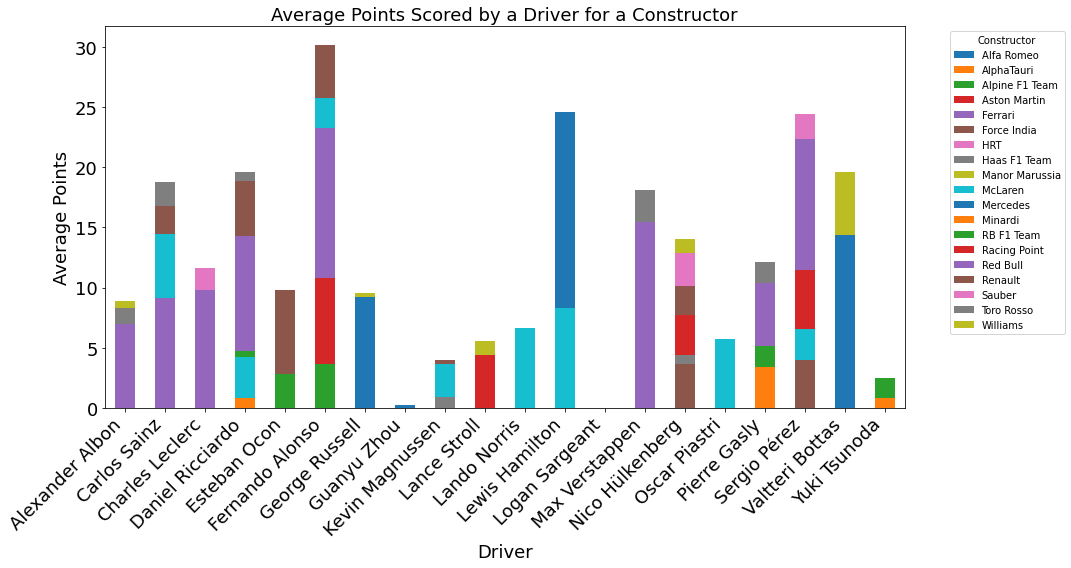

In [13]:
df_pivot = df.pivot(index='fullname', columns='constructor_name', values='avg_points').fillna(0)

# Plot a stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(15, 8))

# Add labels and title
plt.xlabel('Driver', fontsize=18)
plt.ylabel('Average Points', fontsize=18)
plt.title('Average Points Scored by a Driver for a Constructor', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Display the legend
plt.legend(title="Constructor", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### The above graph show the average points scored by a driver during a race for a particular constructor team. It is analysed for the drivers from the F1 2024 calendar. 

### The maximum points a driver can secure during an F1 race is 26. 

### It can be noticed that current F1 World Champion Max Verstappen was part of two constructor teams 'Torro Rosso' and 'Red Bull Racing' through his entire career. He scored an points of 2-3 while he was part of the team Toro Rosso and and 15-16 while he was part of Red Bull.

# Query 2 - Improvement in the Race Performance w.r.t. Fastest Laps

### This query tries to analyse the improvement in the fastest laps of a driver in a given circuit compared to his previous years performance.

### The analysis is performed on the drivers from F1 2024 calendar.

In [14]:
b = spark.sql(f'''WITH FastestLaps AS (
                    SELECT d.driverId, r.year, MIN(res.fastestLapTime) AS fastest_lap
                    FROM results_sql res
                    JOIN drivers_sql d ON res.driverId = d.driverId
                    JOIN races_sql r ON res.raceId = r.raceId
                    WHERE res.fastestLapTime IS NOT NULL
                    GROUP BY d.driverId, r.year
                )
                SELECT  CONCAT_WS(' ', d.forename, d.surname) AS fullname, f1.year, f1.fastest_lap, \
                f2.fastest_lap AS previous_year_lap
                FROM FastestLaps f1
                JOIN FastestLaps f2 ON f1.driverId = f2.driverId AND f1.year = f2.year + 1
                JOIN drivers_sql d ON f1.driverId = d.driverId
                WHERE f1.fastest_lap < f2.fastest_lap 
                AND CONCAT_WS(' ', d.forename, d.surname) IN ({driver_names_sql})
                ORDER BY fullname, f1.year
                ''').toPandas()

b.index = pd.RangeIndex(start=1, stop=len(b)+1, step=1)
b.head(100)




,fullname,year,fastest_lap,previous_year_lap
1,Alexander Albon,2020,0:57.056,1:08.946
2,Alexander Albon,2023,1:09.560,1:09.669
3,Carlos Sainz,2016,1:10.138,1:13.234
4,Carlos Sainz,2017,1:09.150,1:10.138
5,Carlos Sainz,2018,1:08.766,1:09.150
6,Carlos Sainz,2019,1:08.117,1:08.766
7,Carlos Sainz,2020,0:57.165,1:08.117
8,Charles Leclerc,2019,1:07.994,1:09.006
9,Charles Leclerc,2020,1:07.901,1:07.994
10,Charles Leclerc,2022,1:07.583,1:08.698


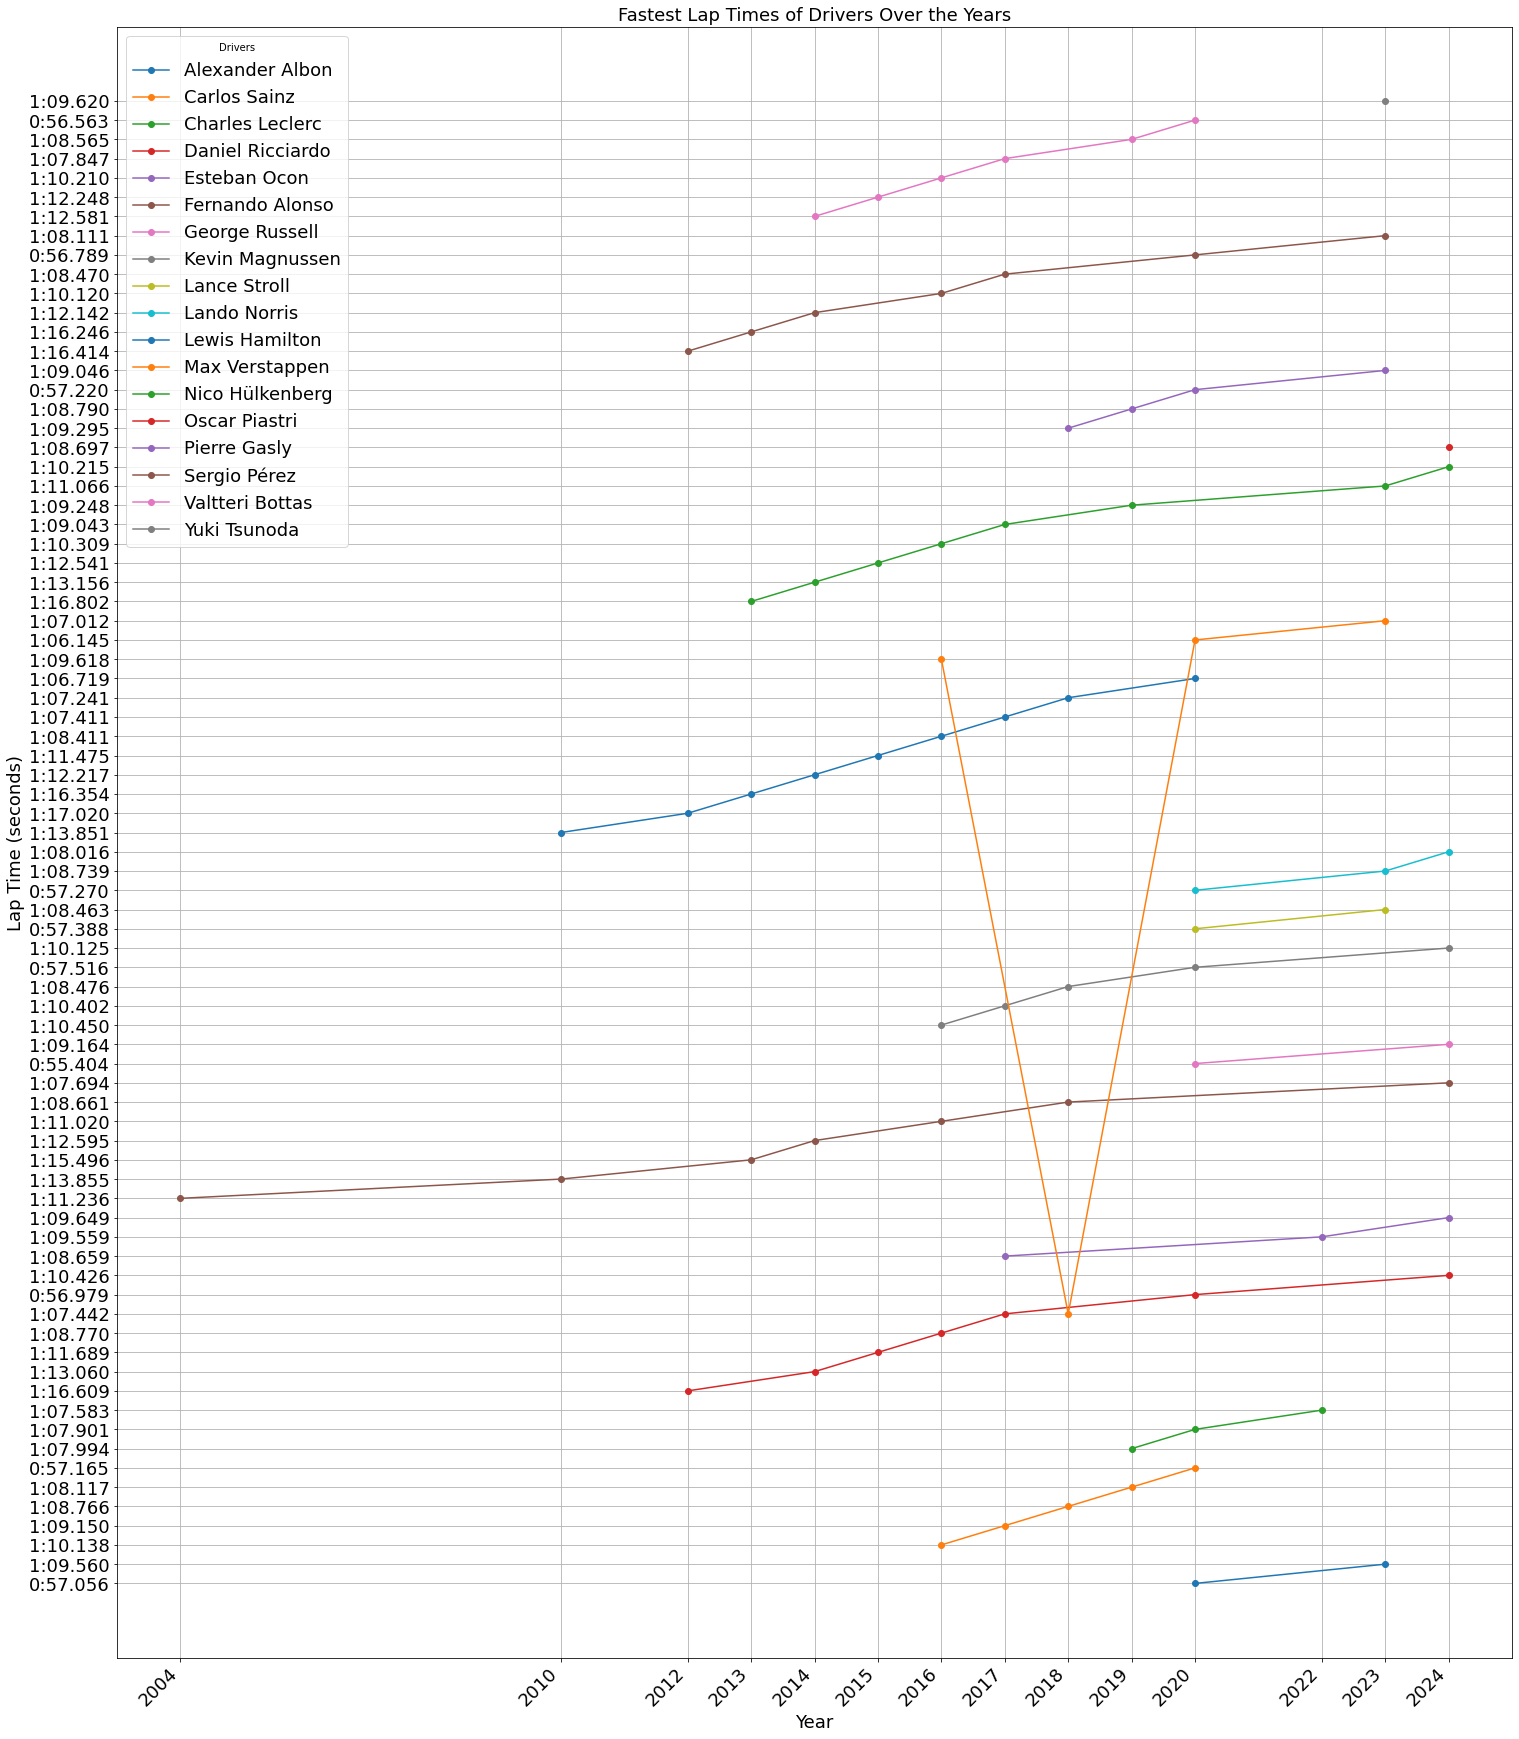

In [15]:
plt.figure(figsize=(25, 30))

# Line plot for each driver
for driver in b['fullname'].unique():
    driver_data = b[b['fullname'] == driver]
    plt.plot(driver_data['year'], driver_data['fastest_lap'], marker='o', label=driver)

# Customizing the plot
plt.title("Fastest Lap Times of Drivers Over the Years", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Lap Time (seconds)", fontsize=18)
plt.xticks(b['year'].unique(), rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Drivers', fontsize=18)
plt.grid(True)

# Show the plot
plt.show()

### The graph shows the improvement in the fastset lap of driver in a griven circuit compared to his previous year's performance.

### Only the years where the performance has improved has been considered and plotted in order to get an idea, by what amout of time has the driver's lap timing improved.

# Query 3 - Average qualifying position of F1 drivers during 2024 calendar

### This query tries to identify the average position qualified by a driver during a race weekend in the F1 2024 calendar

In [16]:
quali = spark.sql("""SELECT d.forename AS Name, r.year AS Year, ROUND(AVG(q.position), 2) AS avg_qualifying_position
                    FROM drivers_sql d
                    INNER JOIN quali_sql q ON d.driverId = q.driverId
                    INNER JOIN races_sql r ON q.raceId = r.raceId
                    WHERE r.year = 2024
                    GROUP BY d.driverId, d.forename, Year
                    ORDER BY avg_qualifying_position
                    """).toPandas()

quali.index = pd.RangeIndex(start=1, stop=len(quali)+1, step=1)
quali.head(30)



,Name,Year,avg_qualifying_position
1,Max,2024,1.83
2,Lando,2024,3.75
3,George,2024,5.08
4,Carlos,2024,5.18
5,Charles,2024,5.25
6,Oscar,2024,5.50
7,Lewis,2024,7.75
8,Sergio,2024,8.25
9,Fernando,2024,10.00
10,Oliver,2024,11.00


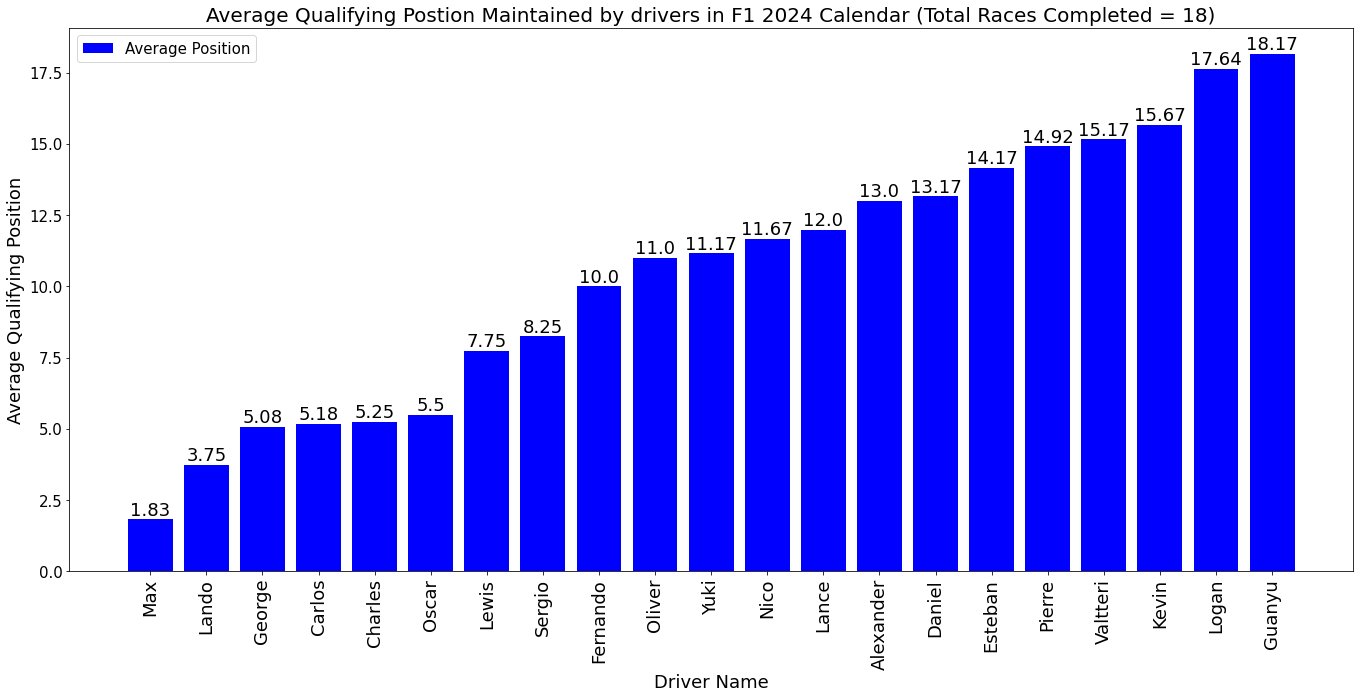

In [17]:
name = [name for name in quali['Name']]
pos = [pos for pos in quali['avg_qualifying_position']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(name, pos, color='blue', label = 'Average Position')

# Add titles and labels
plt.title('Average Qualifying Postion Maintained by drivers in F1 2024 Calendar (Total Races Completed = 18)', fontsize=20)
plt.xlabel('Driver Name', fontsize=18)
plt.ylabel('Average Qualifying Position', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

### This plot above shows the average position secured by a driver during qualifying. Only the races in 2024 calendars have been considered.

### It can be noticed that the present F1 world champion Max Verstappen has managed to maintain an average position of 1.83 in all the races uptil now during the 2024 calendar. This means in all the qualifying from the 2024 calendar that has happend till now, Max Verstappen has managed to secure either position 1 or within position 1-5.

# Query 4 - Counting driver DNFs over their career and the respective reasons

### This query analyses the various race statuses secured by a driver during his entire career.

### The analysis is performed on the drivers from F1 2024 calendar.

In [79]:
# Different race statuses for Lewis Hamilton

ham = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lewis Hamilton'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

ham.index = pd.RangeIndex(start=1, stop=len(ham)+1, step=1)
ham.head(1000)

,status,status_count
1,Finished,301
2,Collision,12
3,+1 Lap,10
4,Engine,3
5,Gearbox,3
6,Puncture,3
7,Disqualified,2
8,Brakes,2
9,Throttle,1
10,Collision damage,1


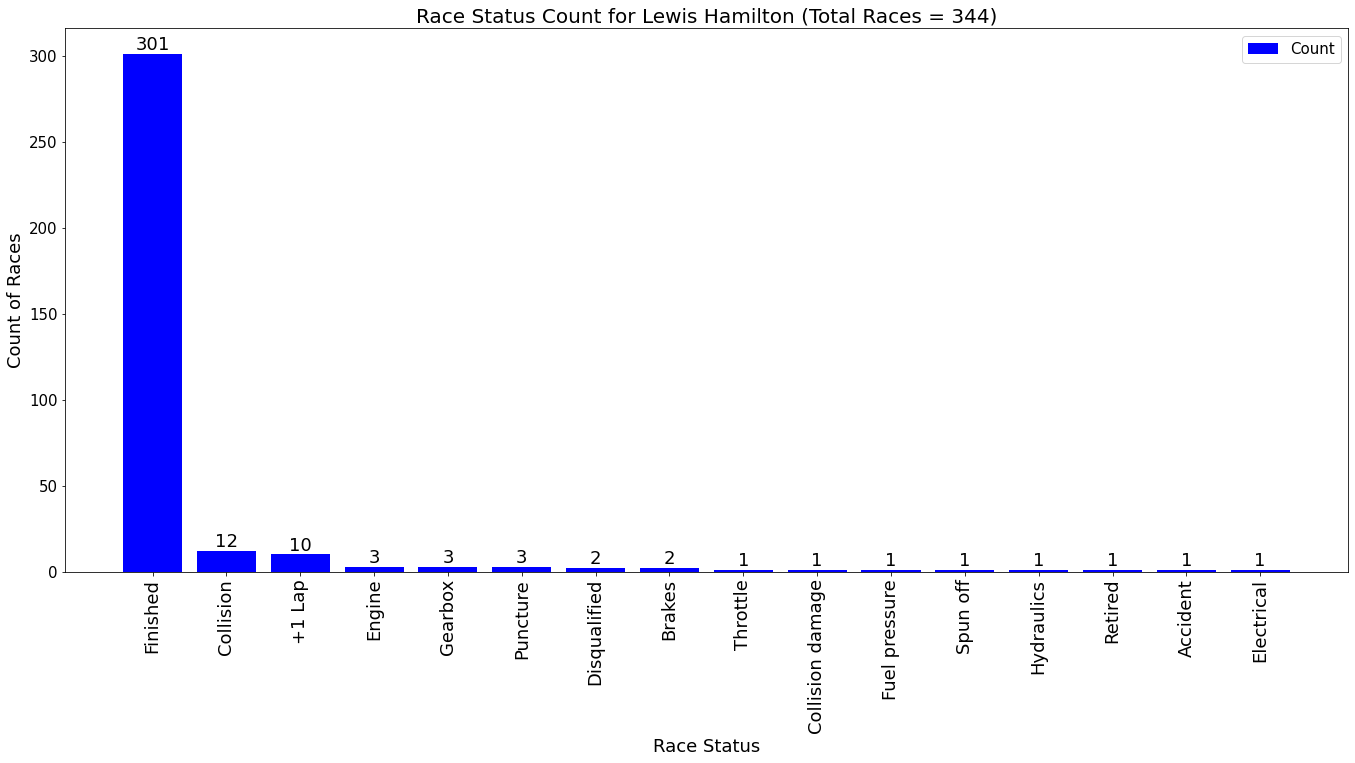

In [19]:
statuses = [status for status in ham['status']]
counts = [count for count in ham['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Lewis Hamilton (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

### The above plot show the various race statuses secured by the driver Lewis Hamilton during his entire career. The graph shows that out of 344 total races participated by Lewis, 301 races were successfully completed. The remaining 43 not completed due to various reason. For e.g. 12 races were not completed as he met with a collion.

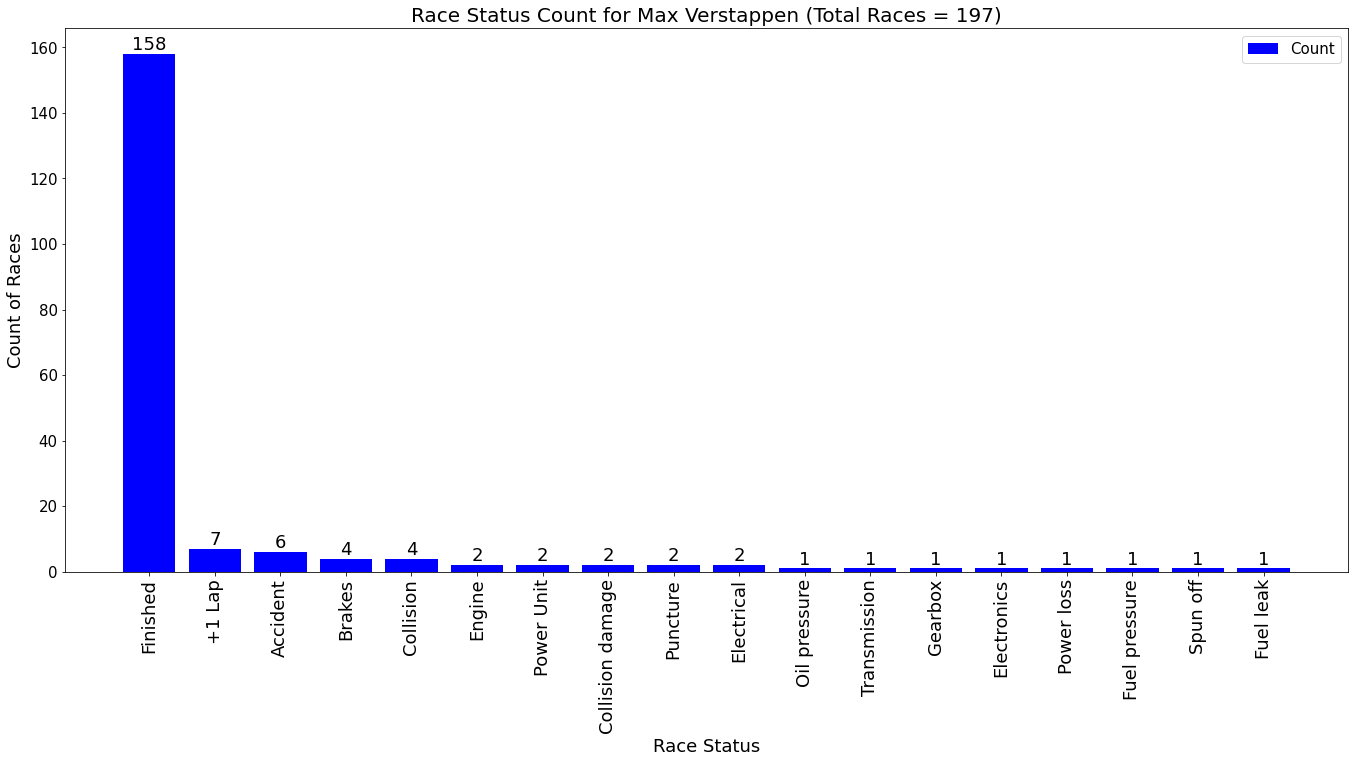

In [20]:
# Different race statuses for Max Verstappen

ves = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Max Verstappen'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

ves.index = pd.RangeIndex(start=1, stop=len(ves)+1, step=1)

statuses = [status for status in ves['status']]
counts = [count for count in ves['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Max Verstappen (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

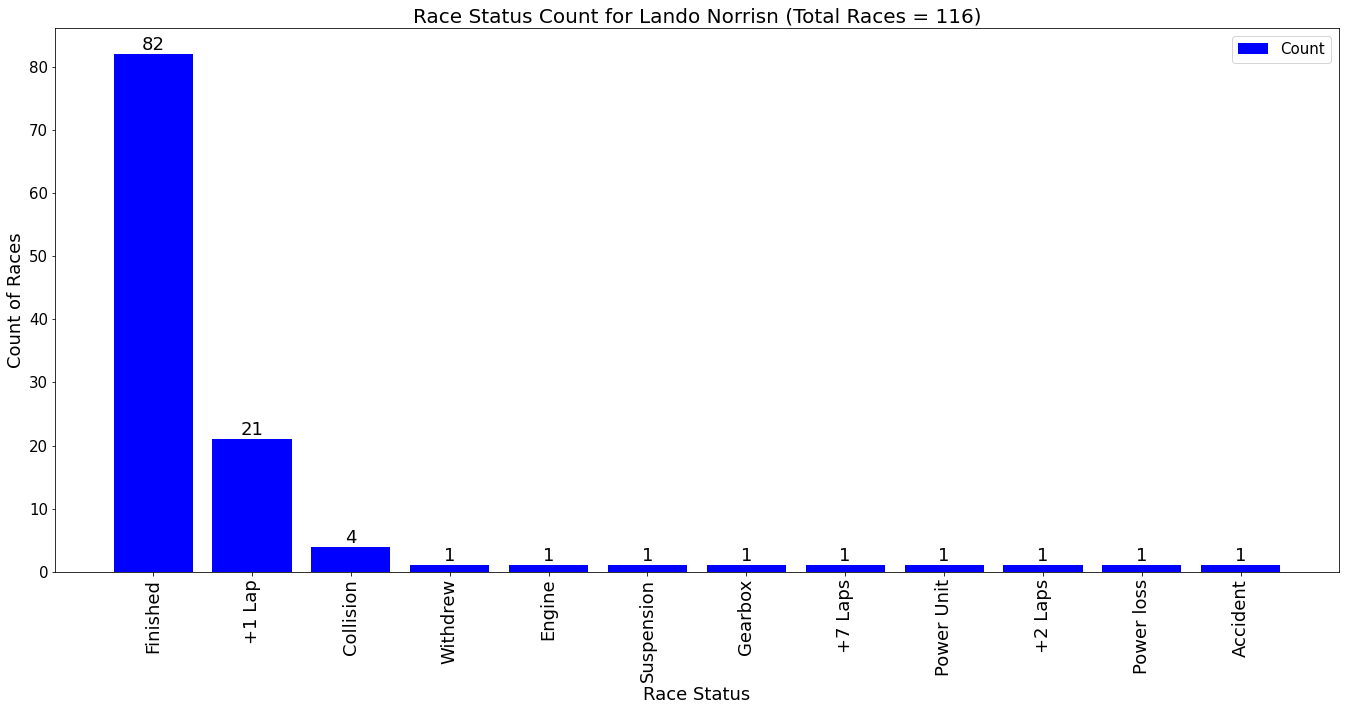

In [21]:
# Different race statuses for Lando Norris

lan = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lando Norris'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

lan.index = pd.RangeIndex(start=1, stop=len(lan)+1, step=1)

statuses = [status for status in lan['status']]
counts = [count for count in lan['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Lando Norrisn (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

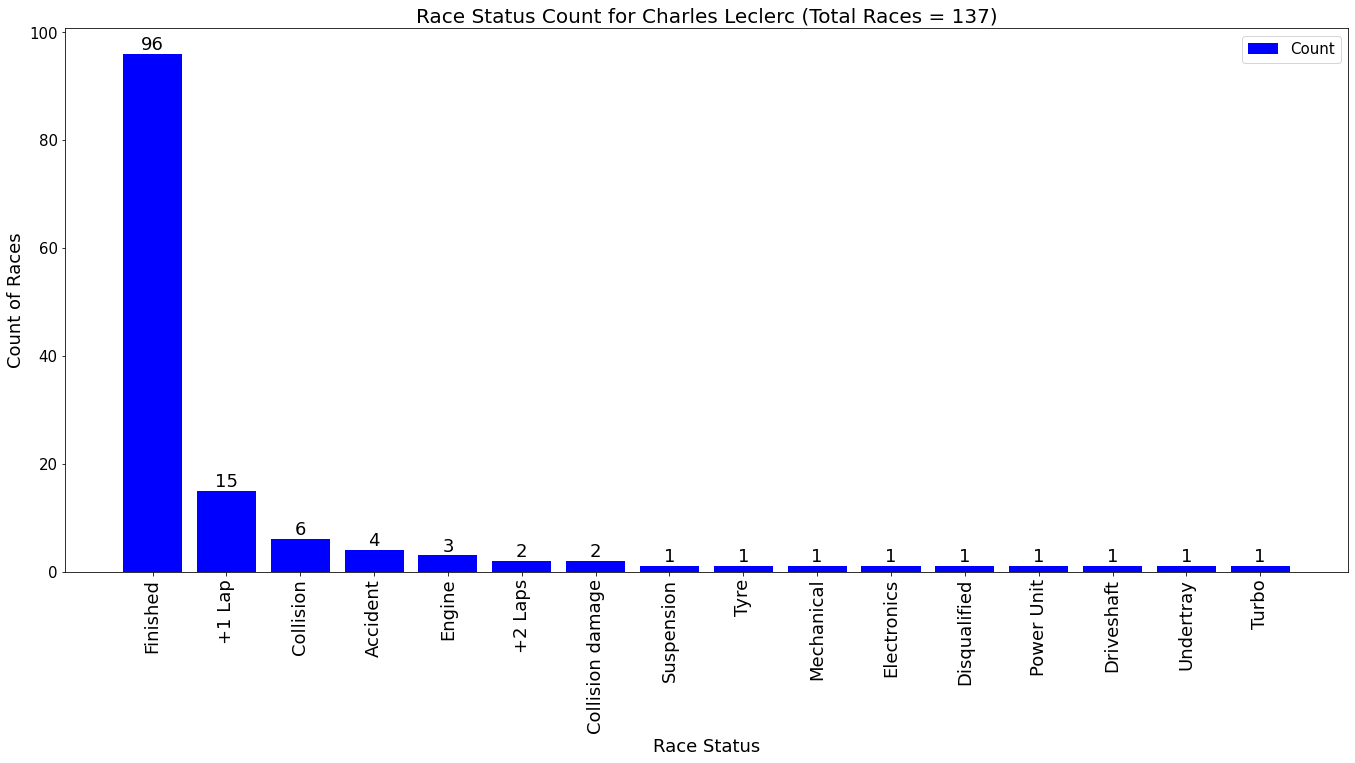

In [22]:
# Different race statuses for Charles Leclerc

lec = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Charles Leclerc'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

lec.index = pd.RangeIndex(start=1, stop=len(lec)+1, step=1)

statuses = [status for status in lec['status']]
counts = [count for count in lec['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Charles Leclerc (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

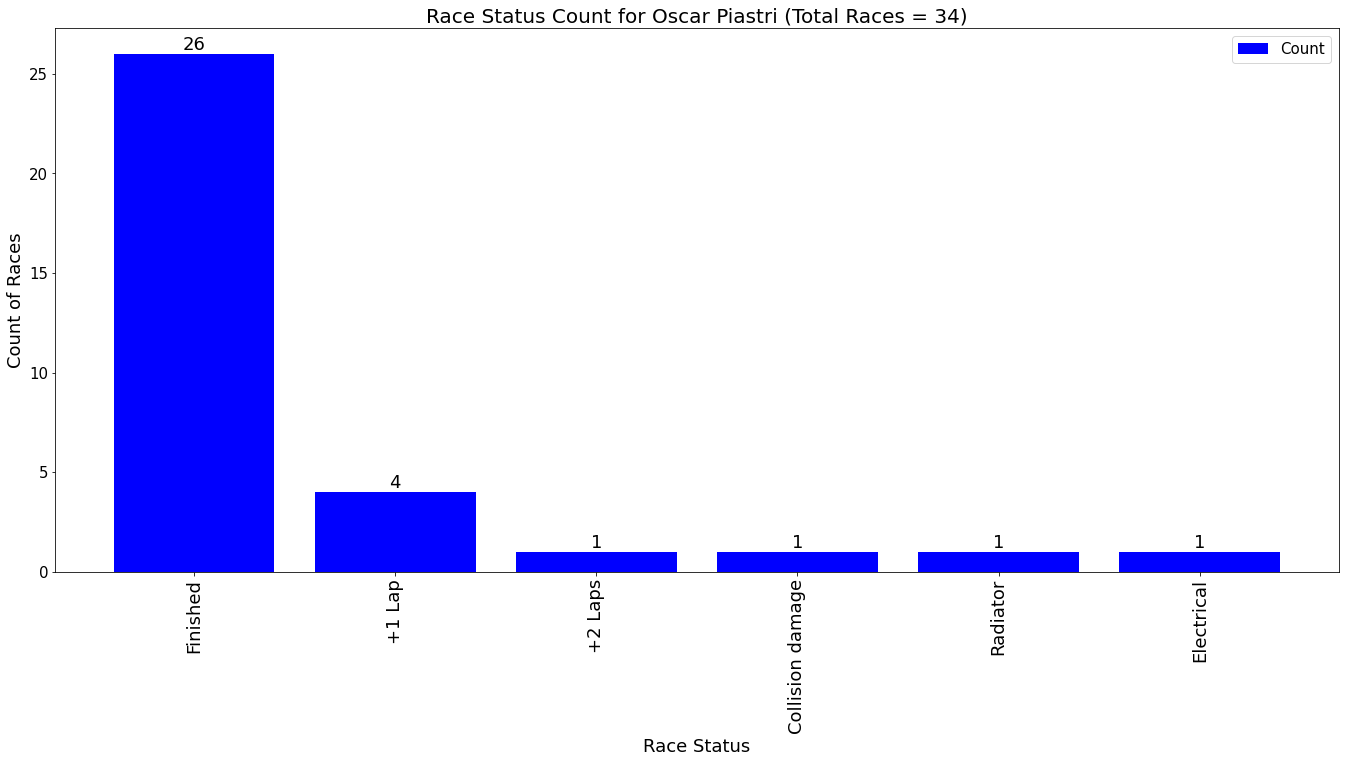

In [23]:
# Different race statuses for Oscar Piastri

osc = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Oscar Piastri'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

osc.index = pd.RangeIndex(start=1, stop=len(osc)+1, step=1)

statuses = [status for status in osc['status']]
counts = [count for count in osc['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Oscar Piastri (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

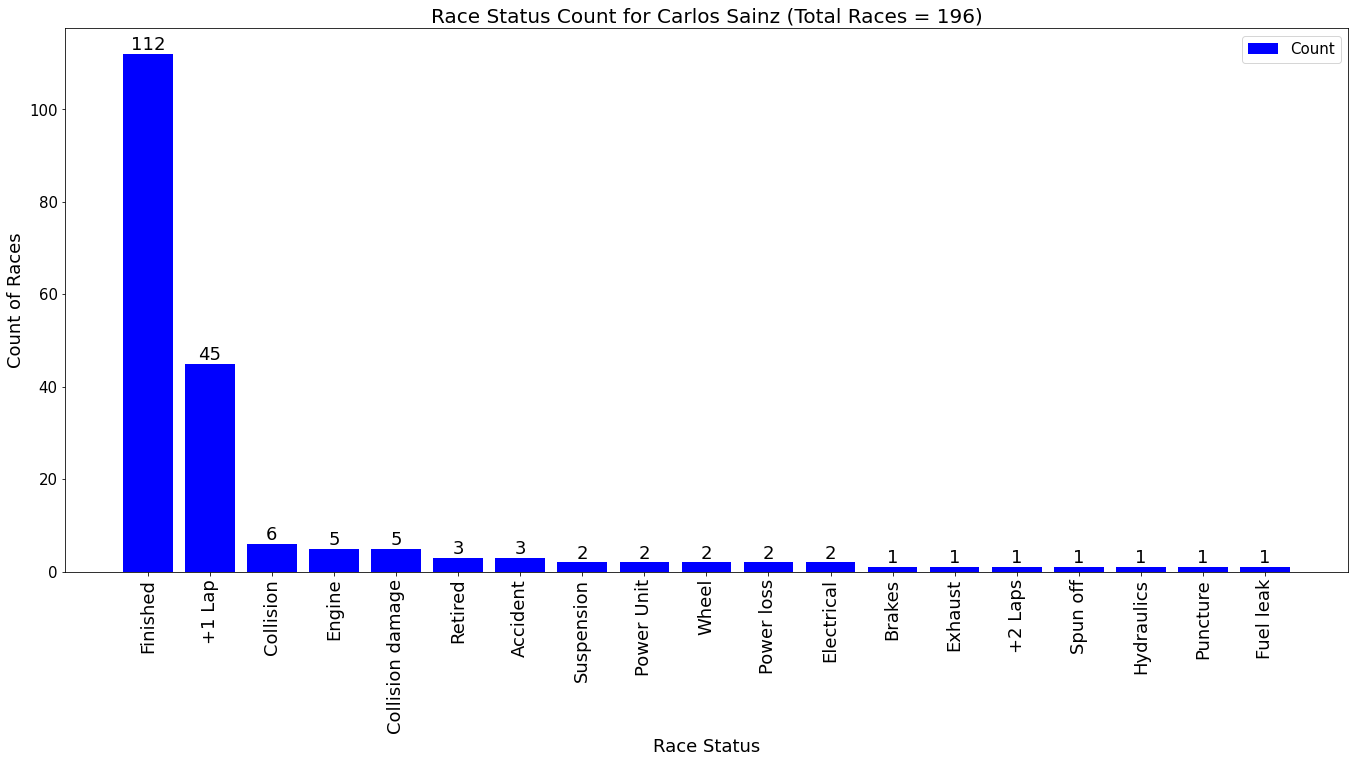

In [24]:
# Different race statuses for Carlos Sainz

car = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Carlos Sainz'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

car.index = pd.RangeIndex(start=1, stop=len(car)+1, step=1)

statuses = [status for status in car['status']]
counts = [count for count in car['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Carlos Sainz (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

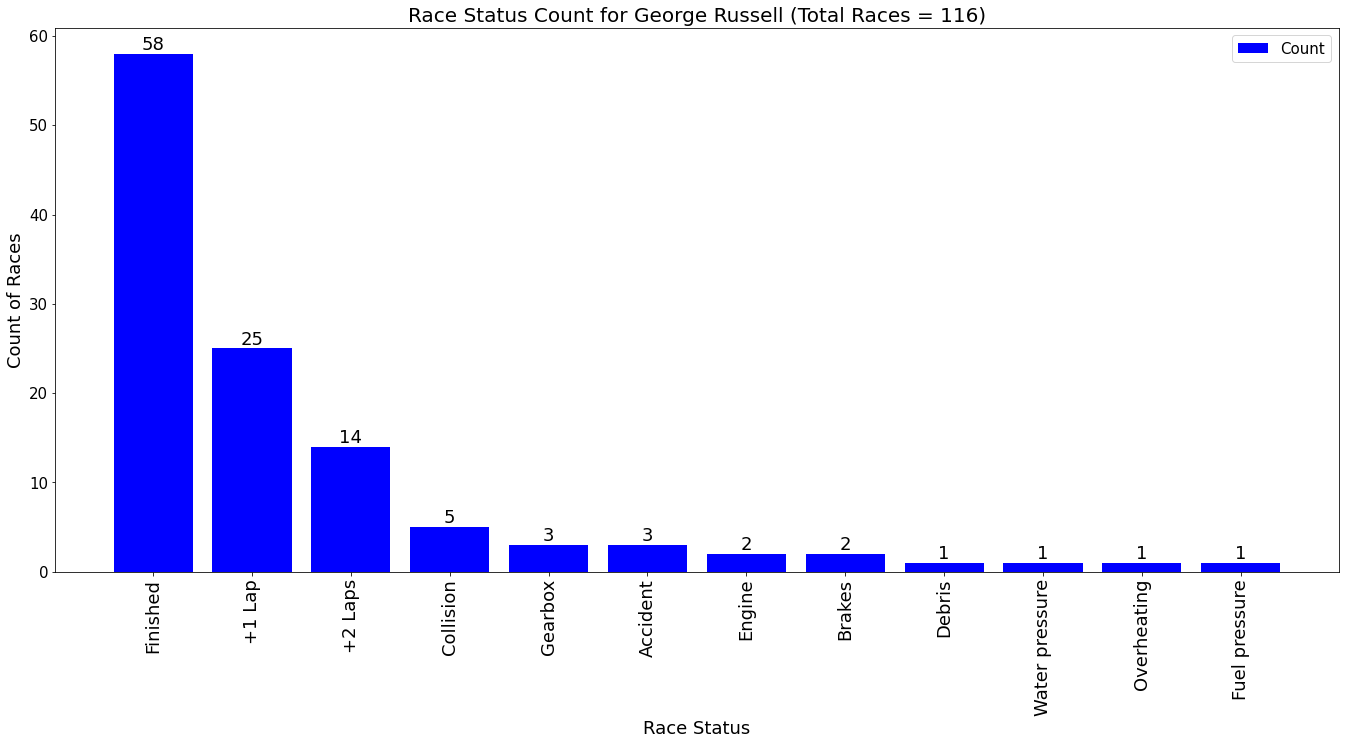

In [25]:
# Different race statuses for George Russell

rus = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'George Russell'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

rus.index = pd.RangeIndex(start=1, stop=len(rus)+1, step=1)

statuses = [status for status in rus['status']]
counts = [count for count in rus['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for George Russell (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

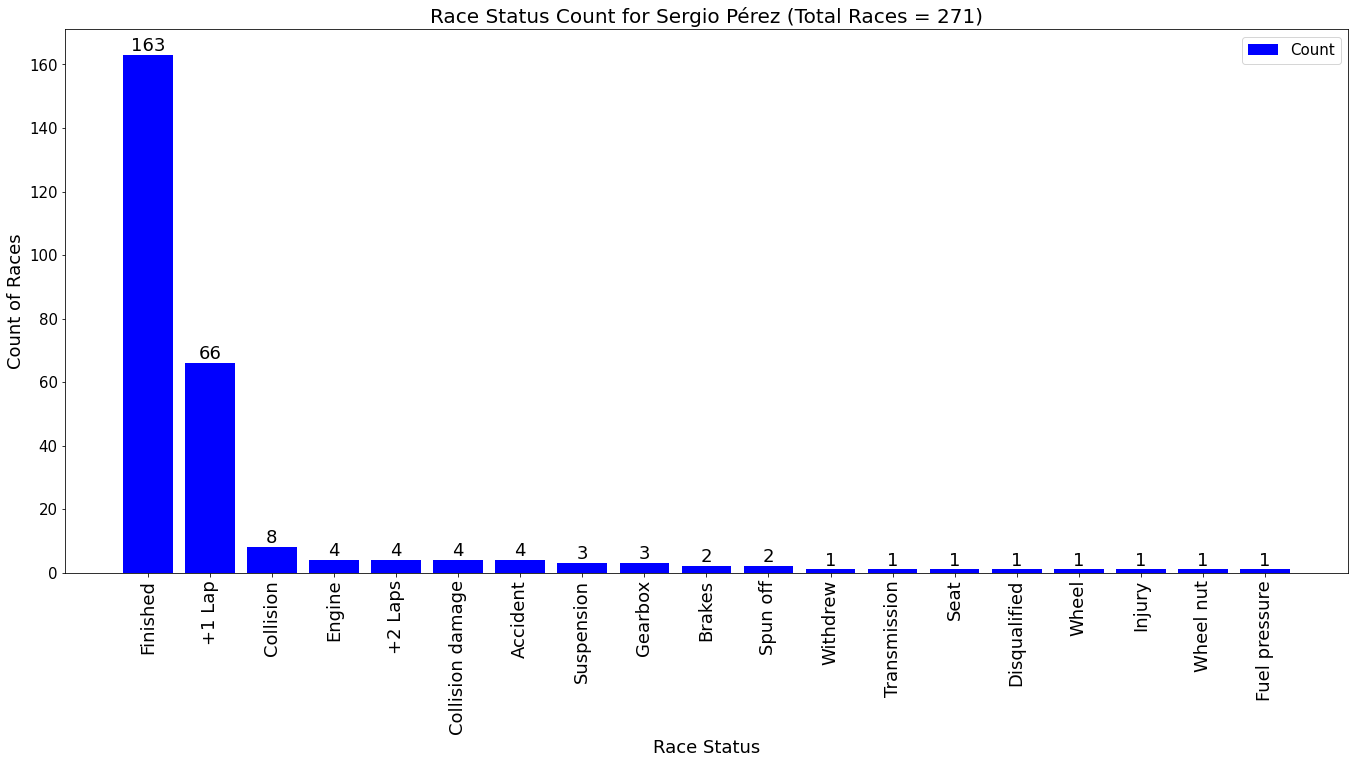

In [26]:
# Different race statuses for Sergio Pérez

per = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Sergio Pérez'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

per.index = pd.RangeIndex(start=1, stop=len(per)+1, step=1)

statuses = [status for status in per['status']]
counts = [count for count in per['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Sergio Pérez (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

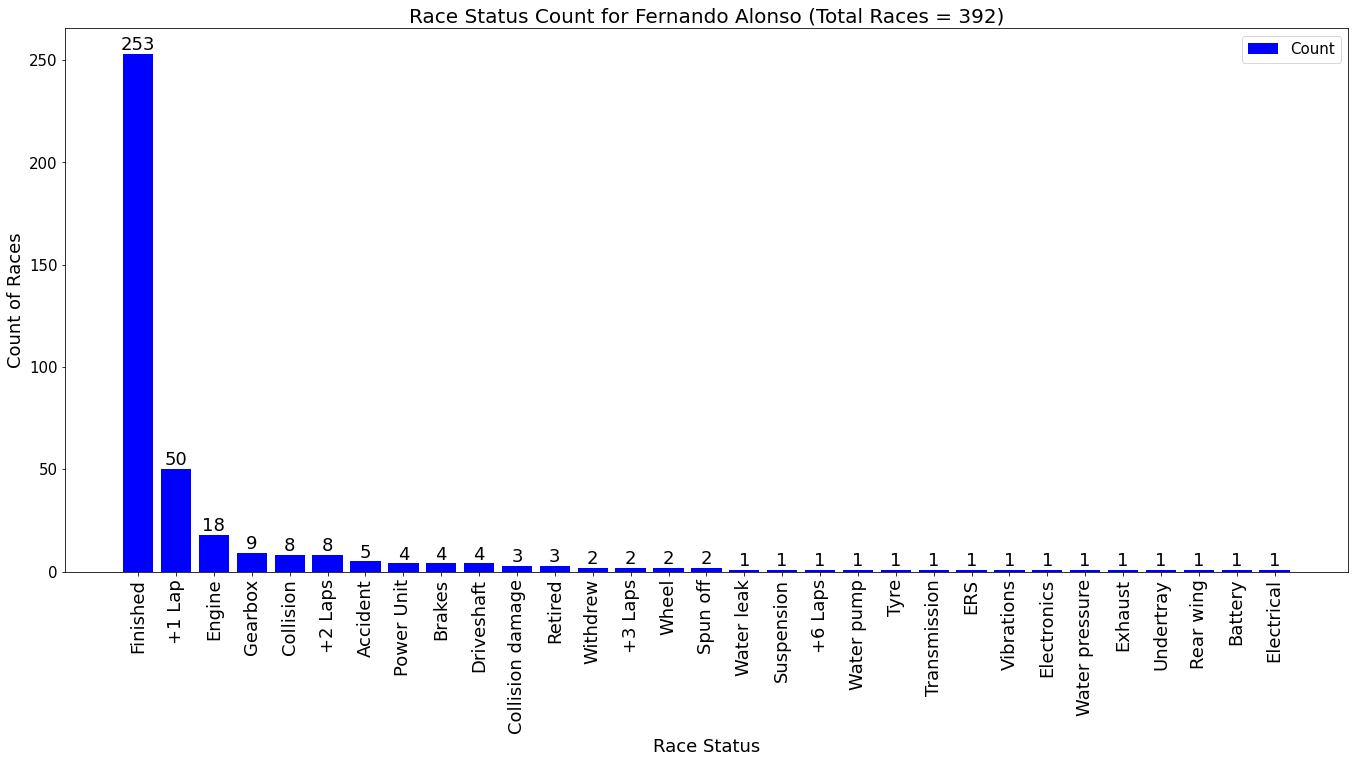

In [27]:
# Different race statuses for Fernando Alonso

alo = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Fernando Alonso'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

alo.index = pd.RangeIndex(start=1, stop=len(alo)+1, step=1)

statuses = [status for status in alo['status']]
counts = [count for count in alo['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Fernando Alonso (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

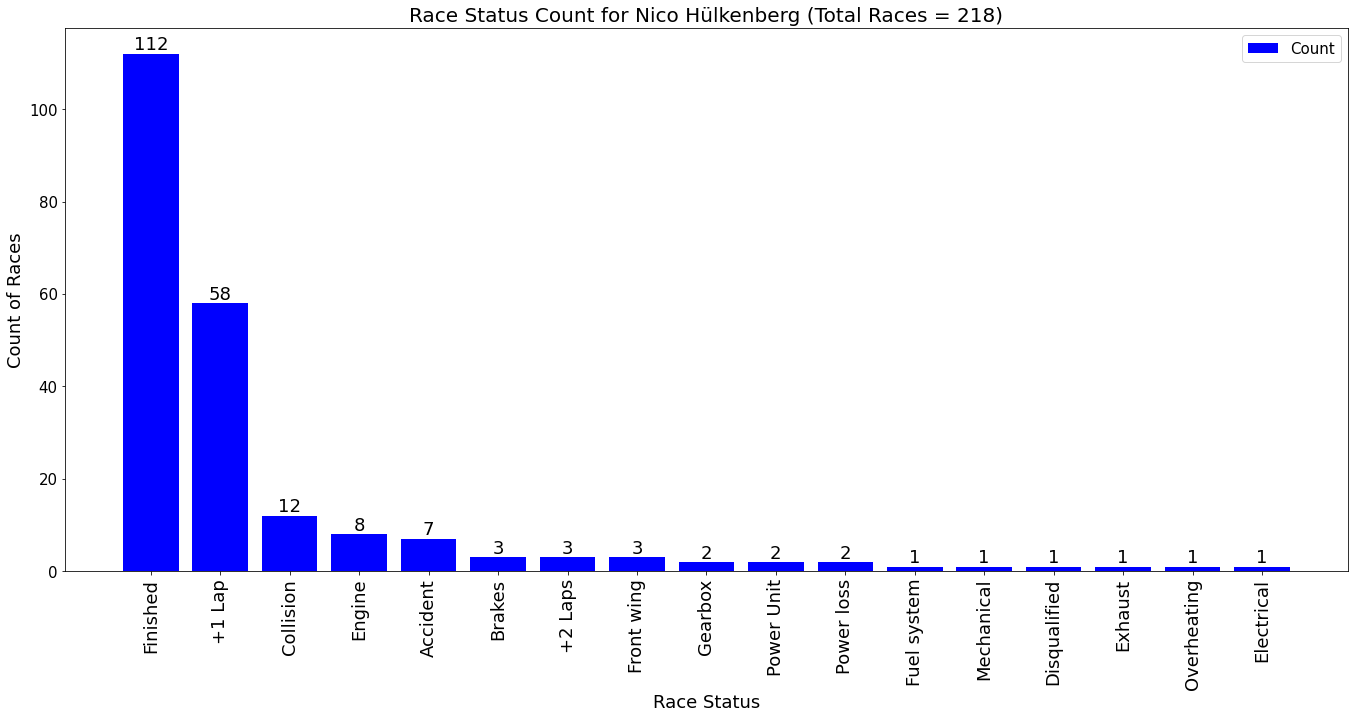

In [28]:
# Different race statuses for Nico Hülkenberg

nic = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Nico Hülkenberg'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

nic.index = pd.RangeIndex(start=1, stop=len(nic)+1, step=1)

statuses = [status for status in nic['status']]
counts = [count for count in nic['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Nico Hülkenberg (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

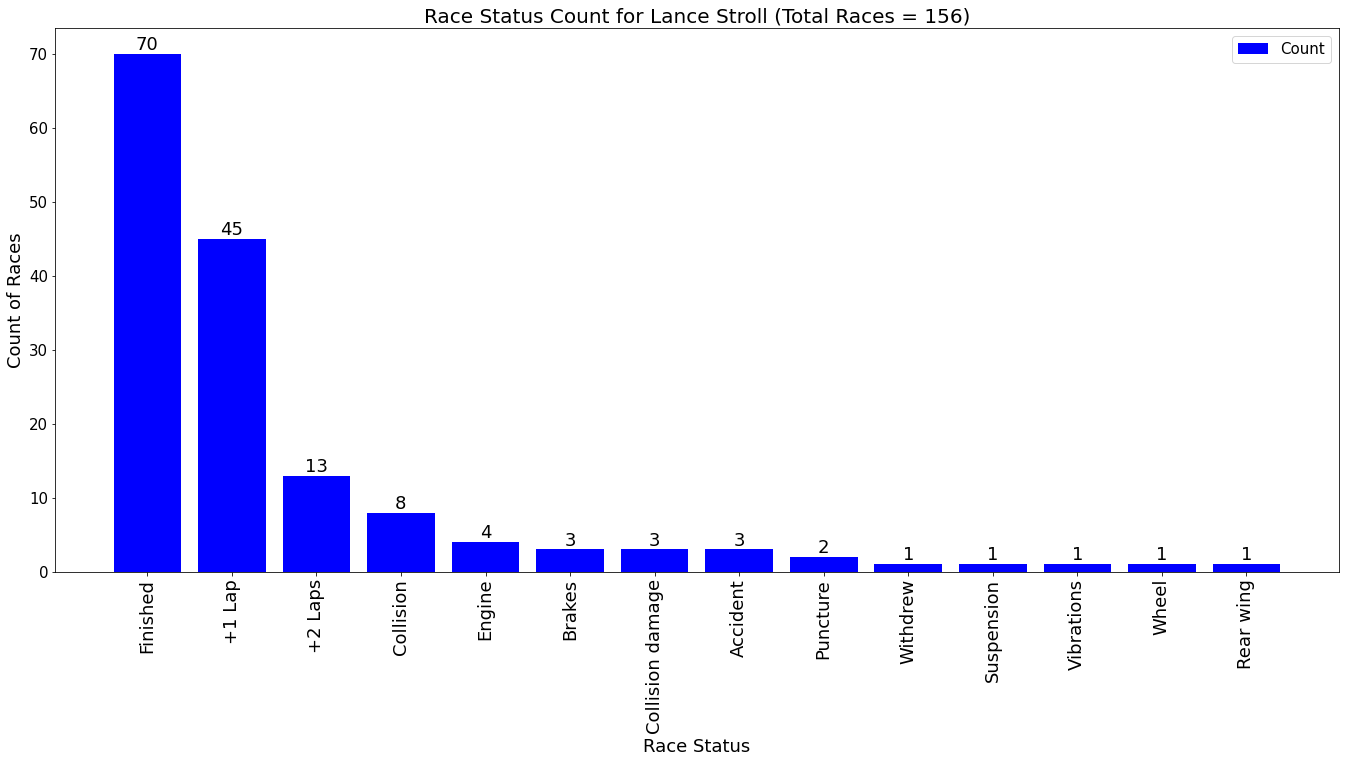

In [29]:
# Different race statuses for Lance Stroll

lanc = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lance Stroll'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

lanc.index = pd.RangeIndex(start=1, stop=len(lanc)+1, step=1)

statuses = [status for status in lanc['status']]
counts = [count for count in lanc['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Lance Stroll (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

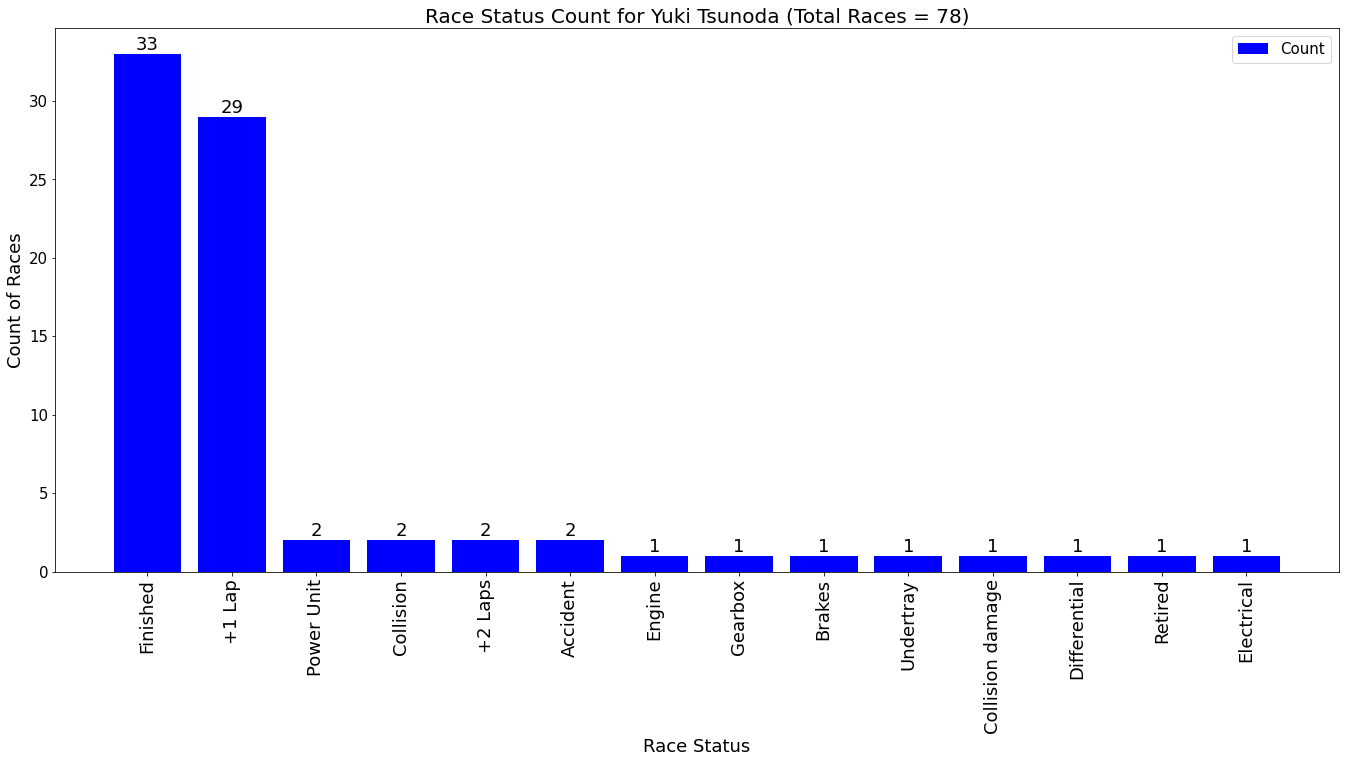

In [30]:
# Different race statuses for Yuki Tsunoda

yuk = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Yuki Tsunoda'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

yuk.index = pd.RangeIndex(start=1, stop=len(yuk)+1, step=1)

statuses = [status for status in yuk['status']]
counts = [count for count in yuk['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Yuki Tsunoda (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

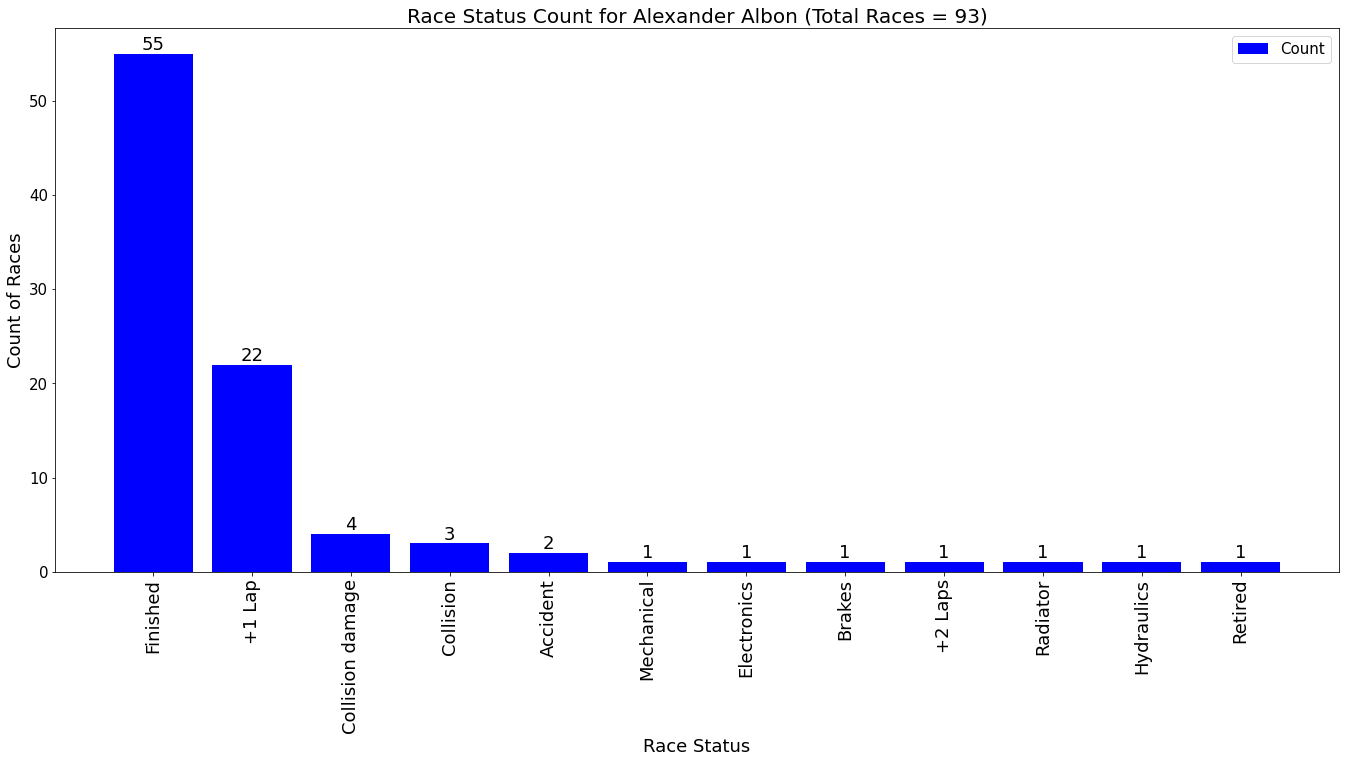

In [31]:
# Different race statuses for Alexander Albon

alex = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Alexander Albon'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

alex.index = pd.RangeIndex(start=1, stop=len(alex)+1, step=1)

statuses = [status for status in alex['status']]
counts = [count for count in alex['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Alexander Albon (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

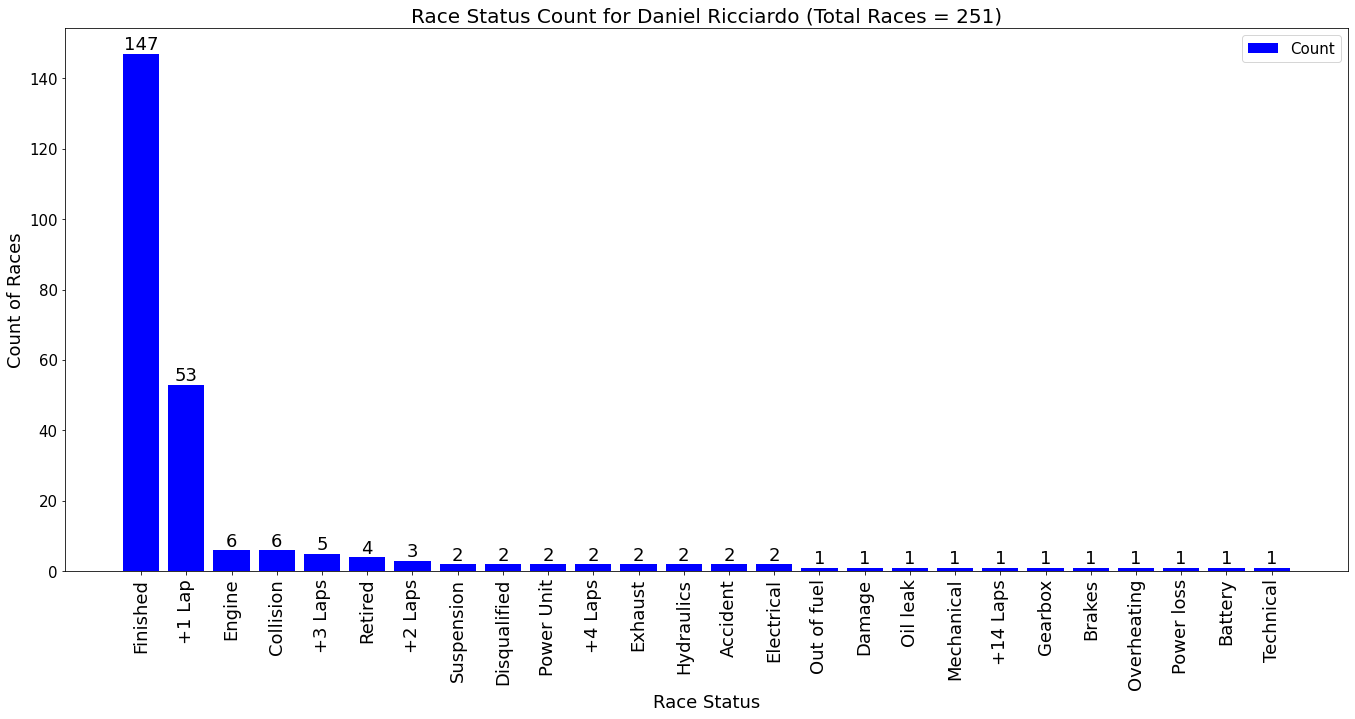

In [32]:
# Different race statuses for Daniel Ricciardo

ric = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Daniel Ricciardo'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

ric.index = pd.RangeIndex(start=1, stop=len(ric)+1, step=1)

statuses = [status for status in ric['status']]
counts = [count for count in ric['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Daniel Ricciardo (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

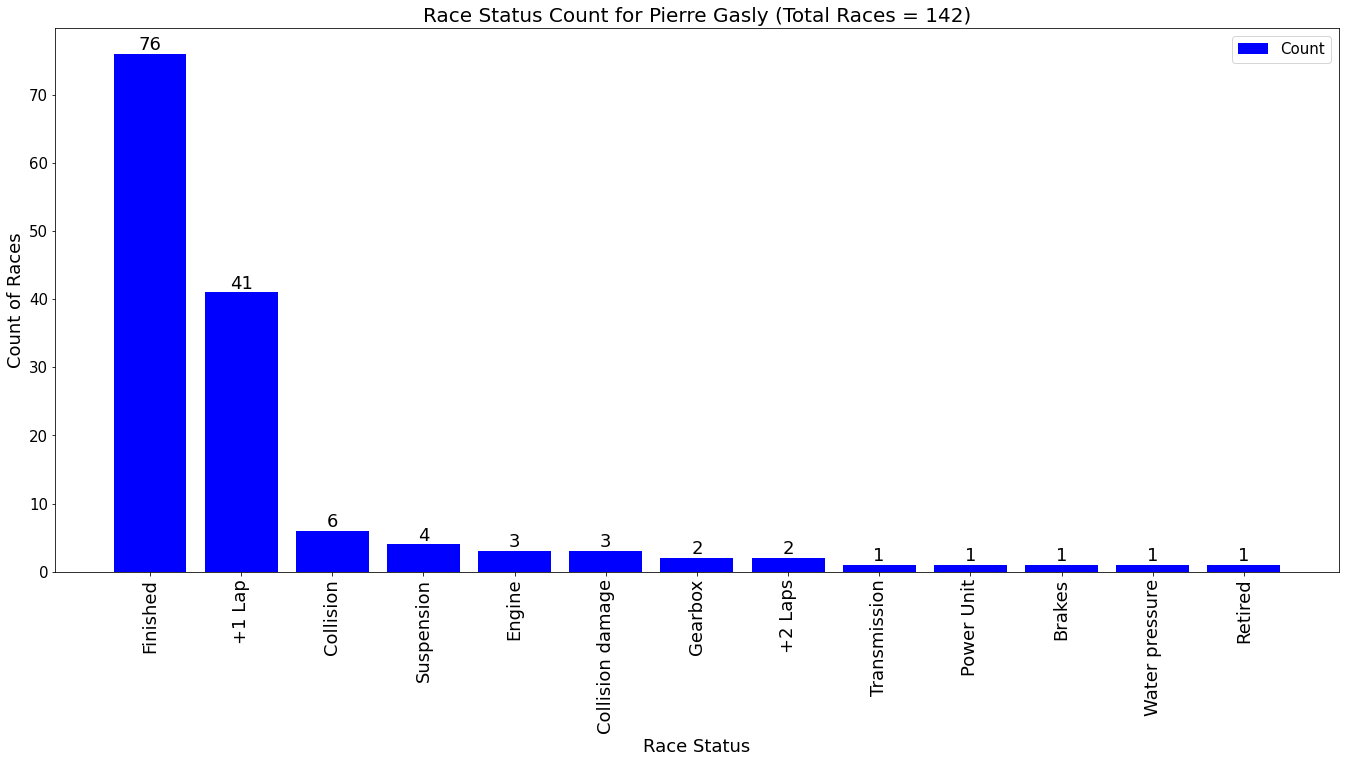

In [33]:
# Different race statuses for Pierre Gasly

gas = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Pierre Gasly'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

gas.index = pd.RangeIndex(start=1, stop=len(gas)+1, step=1)

statuses = [status for status in gas['status']]
counts = [count for count in gas['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Pierre Gasly (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

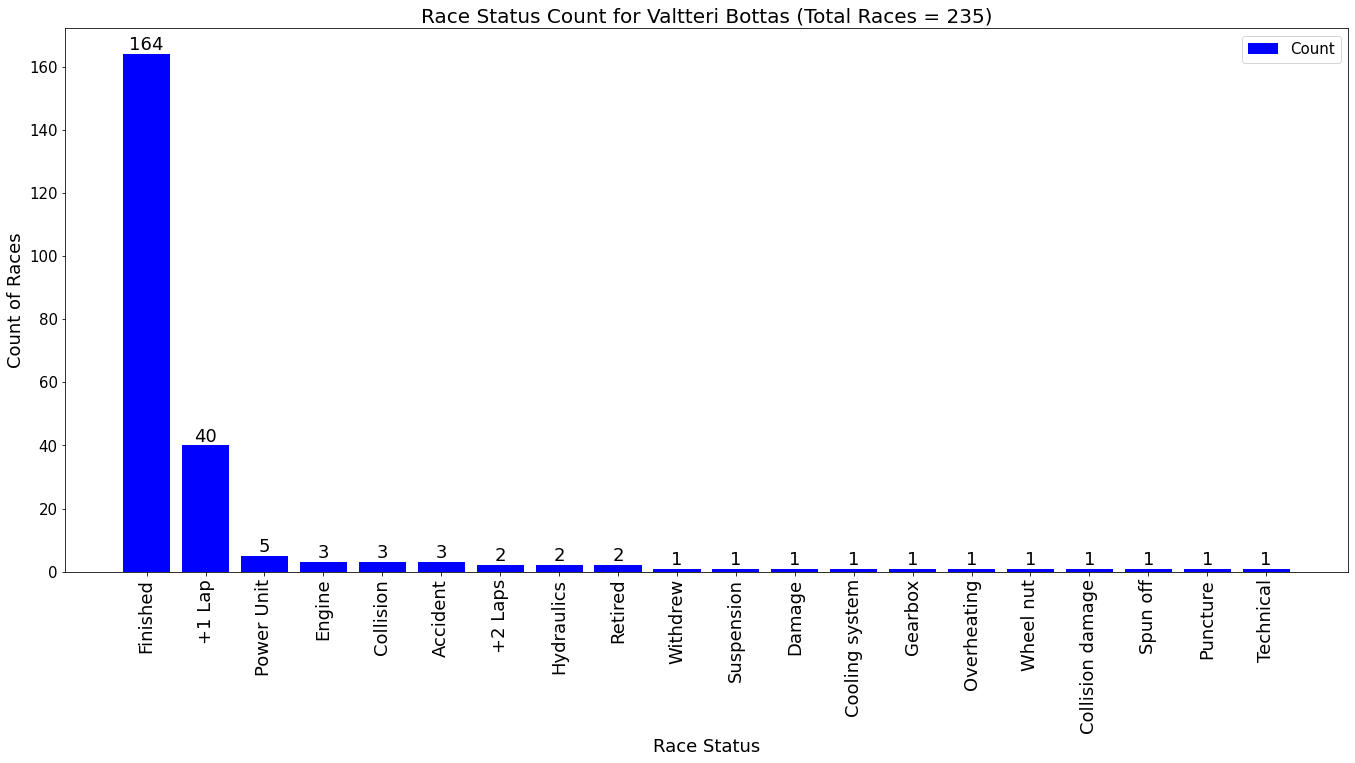

In [34]:
# Different race statuses for Valtteri Bottas

bot = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Valtteri Bottas'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

bot.index = pd.RangeIndex(start=1, stop=len(bot)+1, step=1)

statuses = [status for status in bot['status']]
counts = [count for count in bot['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Valtteri Bottas (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

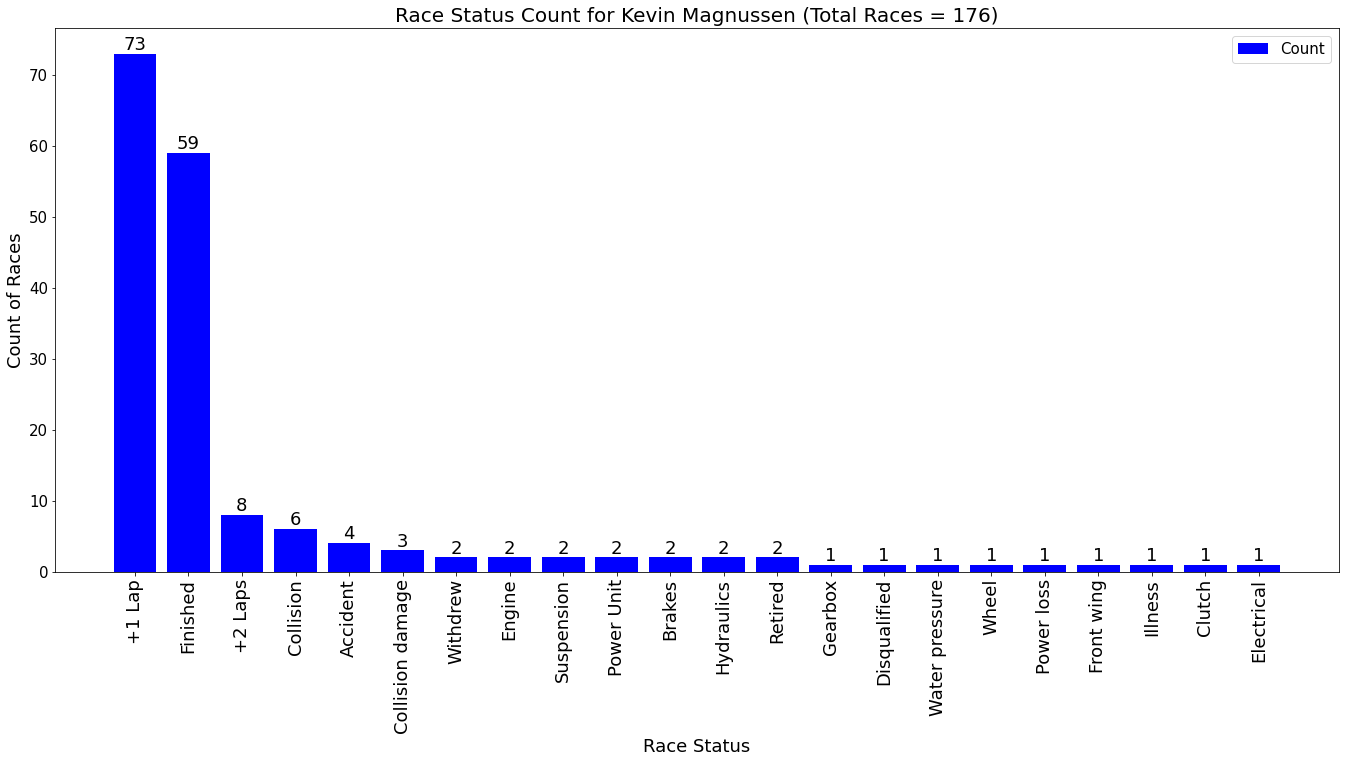

In [35]:
# Different race statuses for Kevin Magnussen

kev = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Kevin Magnussen'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

kev.index = pd.RangeIndex(start=1, stop=len(kev)+1, step=1)

statuses = [status for status in kev['status']]
counts = [count for count in kev['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Kevin Magnussen (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

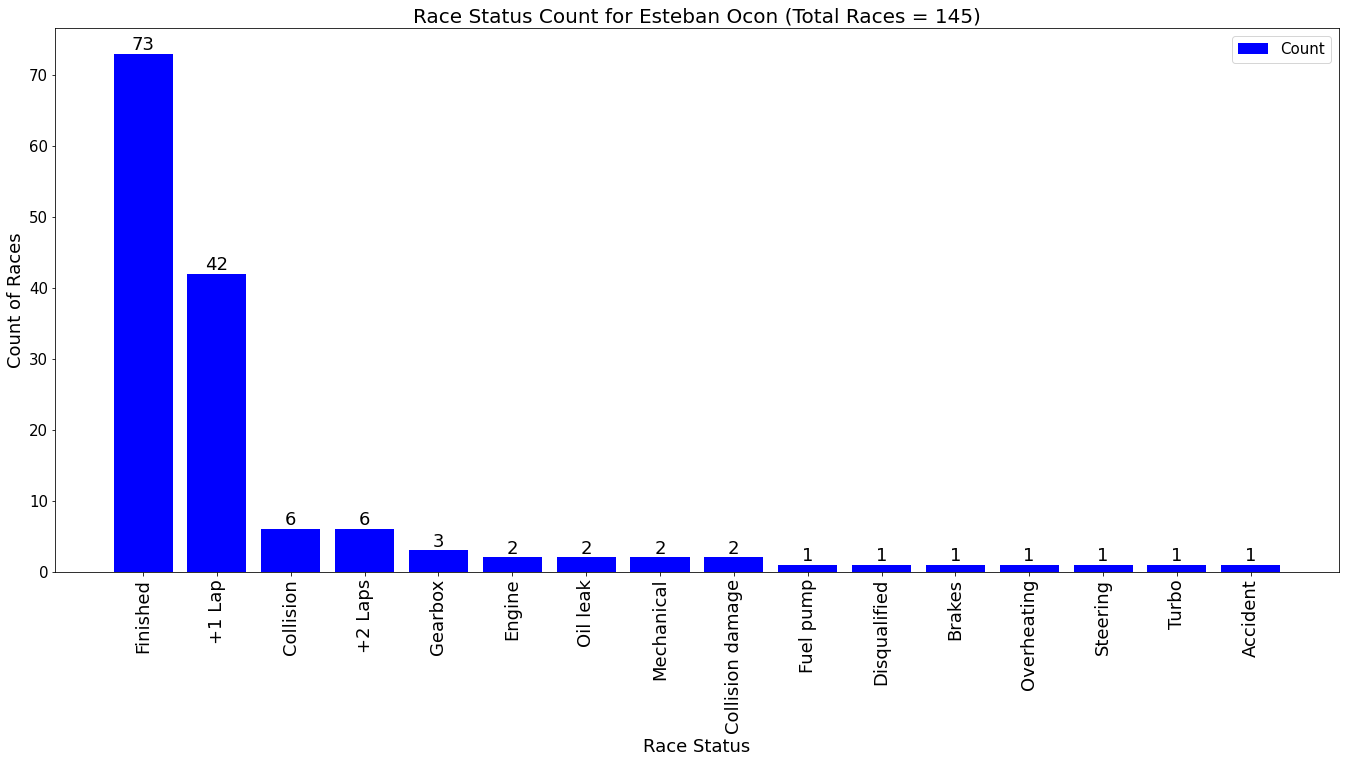

In [36]:
# Different race statuses for Esteban Ocon

oco = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Esteban Ocon'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

oco.index = pd.RangeIndex(start=1, stop=len(oco)+1, step=1)

statuses = [status for status in oco['status']]
counts = [count for count in oco['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Esteban Ocon (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

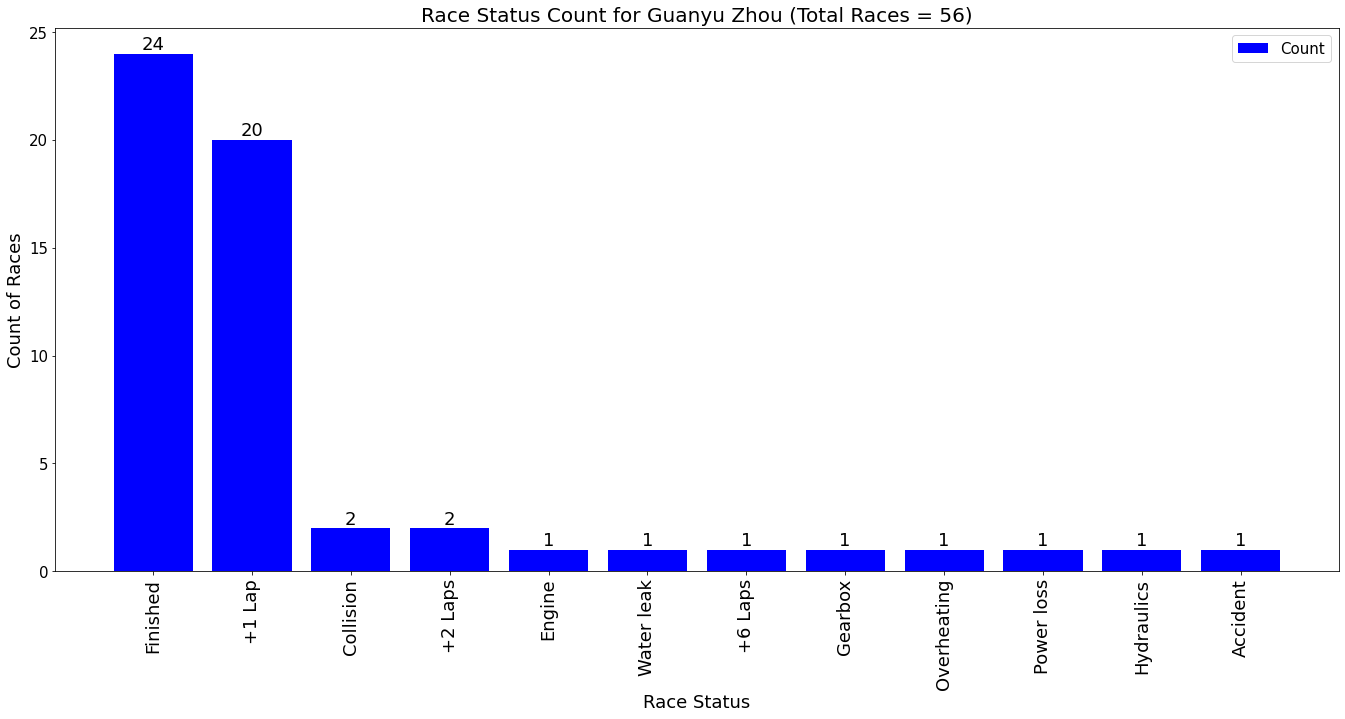

In [37]:
# Different race statuses for Guanyu Zhou

zho = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Guanyu Zhou'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

zho.index = pd.RangeIndex(start=1, stop=len(zho)+1, step=1)

statuses = [status for status in zho['status']]
counts = [count for count in zho['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Guanyu Zhou (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

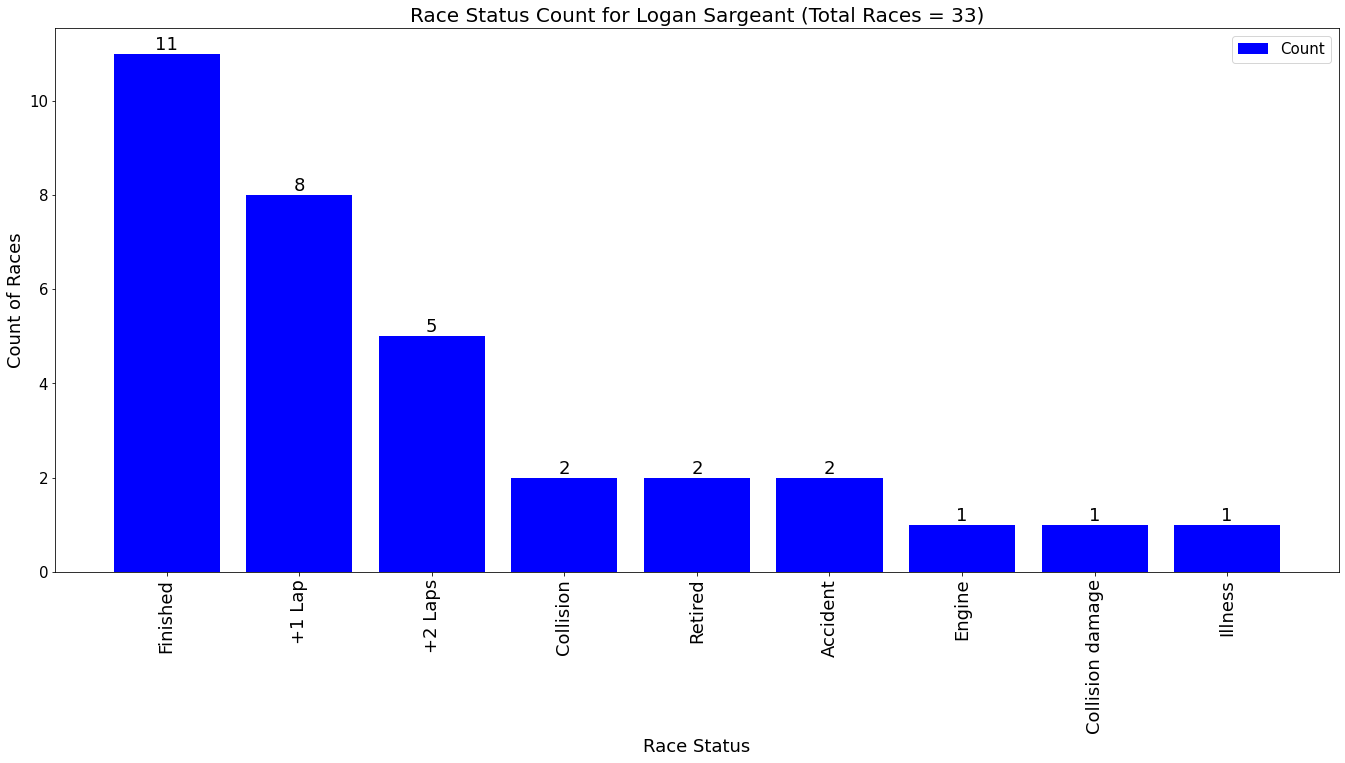

In [38]:
# Different race statuses for Logan Sargeant

log = spark.sql("""SELECT s.status, COUNT(*) AS status_count
                    FROM drivers_sql d
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN status_sql s ON r.statusId = s.statusId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Logan Sargeant'
                    GROUP BY s.status
                    ORDER BY status_count DESC;
                    """).toPandas()

log.index = pd.RangeIndex(start=1, stop=len(log)+1, step=1)

statuses = [status for status in log['status']]
counts = [count for count in log['status_count']]

# Plot the bar chart
plt.figure(figsize=(23, 10))
bars = plt.bar(statuses, counts, color='blue', label = 'Count')

# Add titles and labels
plt.title('Race Status Count for Logan Sargeant (Total Races = ' + f'{sum(counts)})', fontsize=20)
plt.xlabel('Race Status', fontsize=18)
plt.ylabel('Count of Races', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=18)

# Show the plot
plt.show()

# Query 5 - Names of the constructors teams 2024 F1 drivers belonged to during their career

### This query analyses the different constructor teams a driver was part of during his entire career.

### The analysis is performed on the drivers from F1 2024 calendar.

In [39]:
# Different Teams Lewis Hamilton was part of during his career in reverse chronological order

ham = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lewis Hamilton'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
ham.index = pd.RangeIndex(start=1, stop=len(ham)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Lewis Hamilton was part of during his career \n            (from Latest to Old)')

ham.head(1000)


 
        Name of the Constructor Teams 
 Lewis Hamilton was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Mercedes
2,2023,Mercedes
3,2022,Mercedes
4,2021,Mercedes
5,2020,Mercedes
6,2019,Mercedes
7,2018,Mercedes
8,2017,Mercedes
9,2016,Mercedes
10,2015,Mercedes


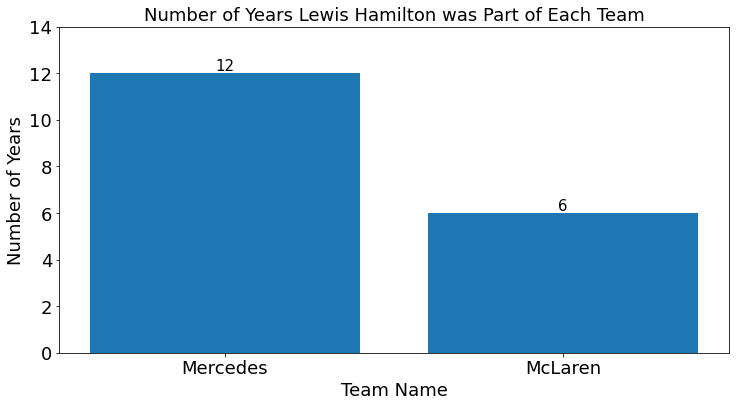

In [40]:
# Count of the number of years Lewis Hamilton was part of a team

ham = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lewis Hamilton'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(ham['Team_Name'], ham['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Lewis Hamilton was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


### The above graph shows that the driver Lewis Hamilton was part of the team Mercedes for 12 years and team McLaren for 6 years.

In [41]:
# Different Teams Max Verstappen was part of during his career in reverse chronological order

vers = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Max Verstappen'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
vers.index = pd.RangeIndex(start=1, stop=len(vers)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Max Verstappen was part of during his career \n            (from Latest to Old)')

vers.head(1000)


 
        Name of the Constructor Teams 
 Max Verstappen was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Red Bull
2,2023,Red Bull
3,2022,Red Bull
4,2021,Red Bull
5,2020,Red Bull
6,2019,Red Bull
7,2018,Red Bull
8,2017,Red Bull
9,2016,Red Bull
10,2016,Toro Rosso


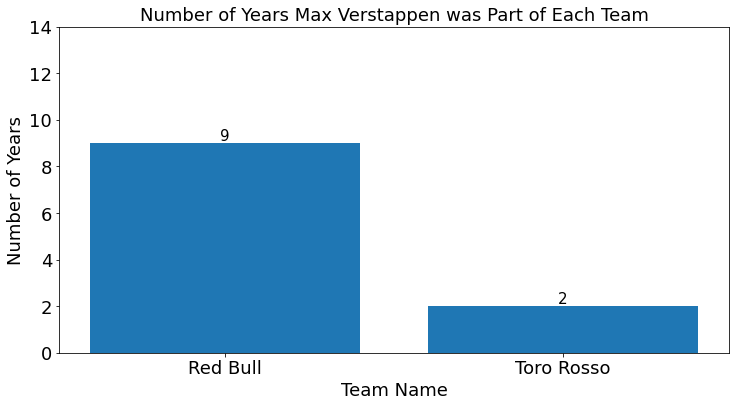

In [42]:
# Count of the number of years the Verstappen was part of a team

vers = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Max Verstappen'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(vers['Team_Name'], vers['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Max Verstappen was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [43]:
# Different Teams Lando Norris was part of during his career in reverse chronological order

lan = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lando Norris'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
lan.index = pd.RangeIndex(start=1, stop=len(lan)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Lando Norris was part of during his career \n            (from Latest to Old)')

lan.head(1000)


 
        Name of the Constructor Teams 
 Lando Norris was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,McLaren
2,2023,McLaren
3,2022,McLaren
4,2021,McLaren
5,2020,McLaren
6,2019,McLaren


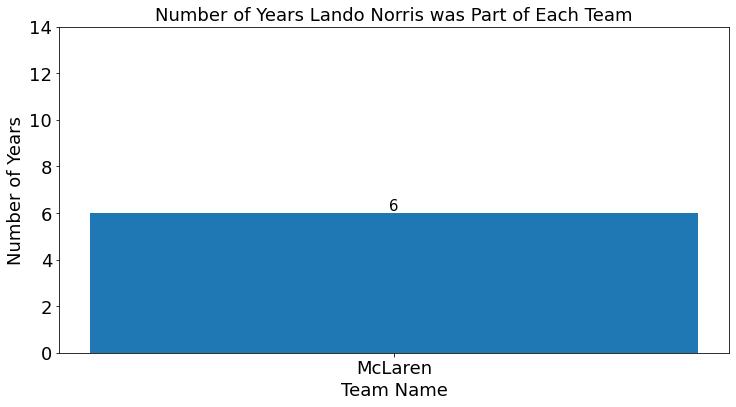

In [44]:
# Count of the number of years Lando Norris was part of a team

lan = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lando Norris'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(lan['Team_Name'], lan['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Lando Norris was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [45]:
# Different Teams Charles Leclerc was part of during his career in reverse chronological order

lec = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Charles Leclerc'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
lec.index = pd.RangeIndex(start=1, stop=len(lec)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Charles Leclerc was part of during his career \n            (from Latest to Old)')

lec.head(1000)


 
        Name of the Constructor Teams 
 Charles Leclerc was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Ferrari
2,2023,Ferrari
3,2022,Ferrari
4,2021,Ferrari
5,2020,Ferrari
6,2019,Ferrari
7,2018,Sauber


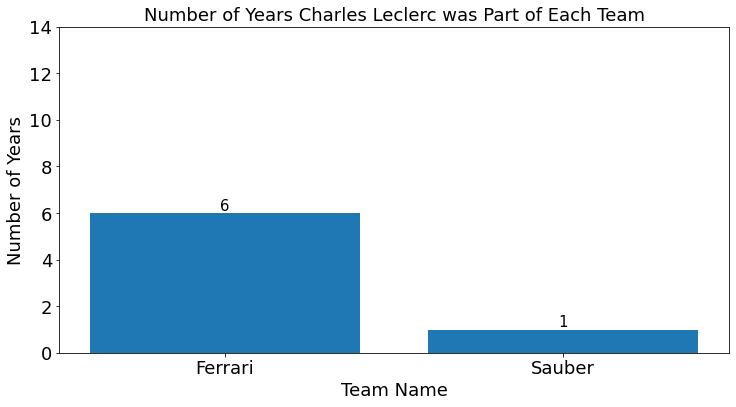

In [46]:
# Count of the number of years Charles Leclerc was part of a team

lec = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Charles Leclerc'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(lec['Team_Name'], lec['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Charles Leclerc was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [47]:
# Different Teams Oscar Piastri was part of during his career in reverse chronological order

osc = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Oscar Piastri'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
osc.index = pd.RangeIndex(start=1, stop=len(osc)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Oscar Piastri was part of during his career \n            (from Latest to Old)')

osc.head(1000)


 
        Name of the Constructor Teams 
 Oscar Piastri was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,McLaren
2,2023,McLaren


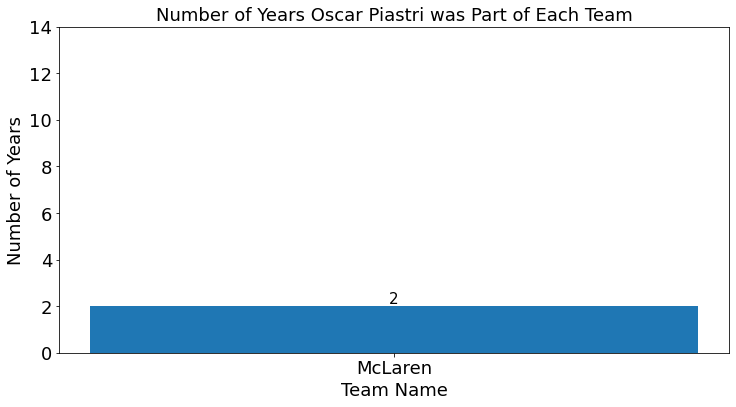

In [48]:
# Count of the number of years Oscar Piastri was part of a team

osc = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Oscar Piastri'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(osc['Team_Name'], osc['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Oscar Piastri was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [49]:
# Different Teams Carlos Sainz was part of during his career in reverse chronological order

car = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Carlos Sainz'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
car.index = pd.RangeIndex(start=1, stop=len(car)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Carlos Sainz was part of during his career \n            (from Latest to Old)')

car.head(1000)


 
        Name of the Constructor Teams 
 Carlos Sainz was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Ferrari
2,2023,Ferrari
3,2022,Ferrari
4,2021,Ferrari
5,2020,McLaren
6,2019,McLaren
7,2018,Renault
8,2017,Renault
9,2017,Toro Rosso
10,2016,Toro Rosso


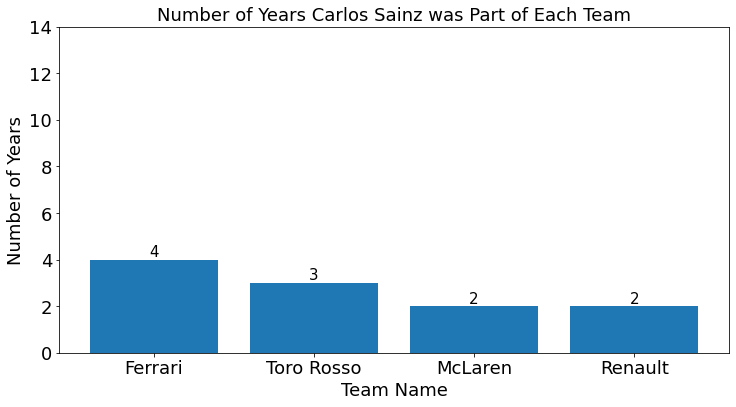

In [50]:
# Count of the number of years Carlos Sainz was part of a team

car = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Carlos Sainz'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(car['Team_Name'], car['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Carlos Sainz was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [51]:
# Different Teams George Russell was part of during his career in reverse chronological order

rus = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'George Russell'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
rus.index = pd.RangeIndex(start=1, stop=len(rus)+1, step=1)

print('\n \n        Name of the Constructor Teams \n George Russell was part of during his career \n            (from Latest to Old)')

rus.head(1000)


 
        Name of the Constructor Teams 
 George Russell was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Mercedes
2,2023,Mercedes
3,2022,Mercedes
4,2021,Williams
5,2020,Mercedes
6,2020,Williams
7,2019,Williams


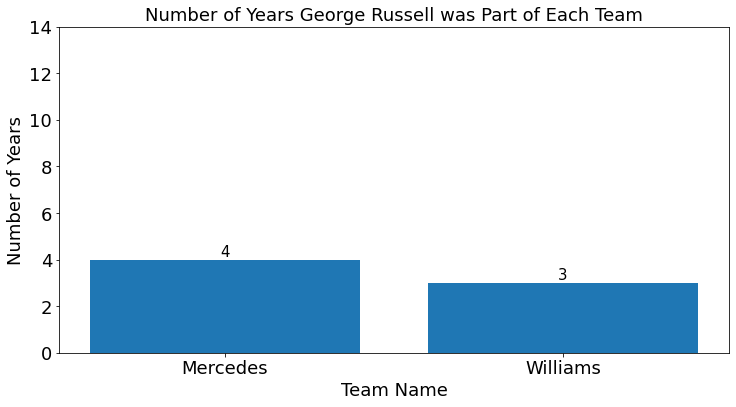

In [52]:
# Count of the number of years George Russell was part of a team

rus = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'George Russell'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(rus['Team_Name'], rus['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years George Russell was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [53]:
# Different Teams Sergio Pérez was part of during his career in reverse chronological order

per = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Sergio Pérez'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
per.index = pd.RangeIndex(start=1, stop=len(per)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Sergio Pérez was part of during his career \n            (from Latest to Old)')

per.head(1000)


 
        Name of the Constructor Teams 
 Sergio Pérez was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Red Bull
2,2023,Red Bull
3,2022,Red Bull
4,2021,Red Bull
5,2020,Racing Point
6,2019,Racing Point
7,2018,Force India
8,2017,Force India
9,2016,Force India
10,2015,Force India


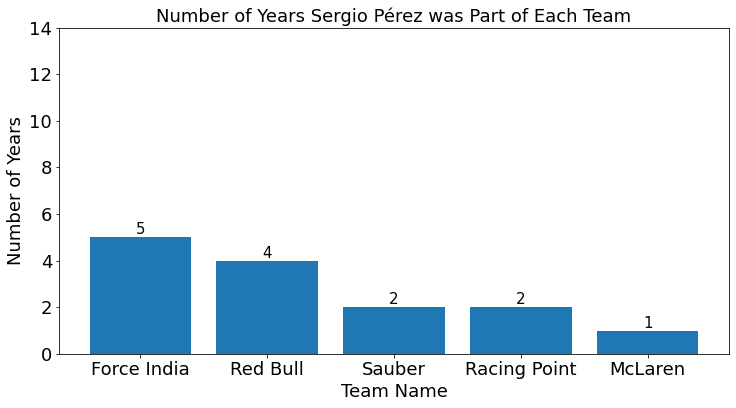

In [54]:
# Count of the number of years Sergio Pérez was part of a team

per = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Sergio Pérez'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(per['Team_Name'], per['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Sergio Pérez was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [55]:
# Different Teams Fernando Alonso was part of during his career in reverse chronological order

fer = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Fernando Alonso'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
fer.index = pd.RangeIndex(start=1, stop=len(fer)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Fernando Alonso was part of during his career \n            (from Latest to Old)')

fer.head(1000)


 
        Name of the Constructor Teams 
 Fernando Alonso was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Aston Martin
2,2023,Aston Martin
3,2022,Alpine F1 Team
4,2021,Alpine F1 Team
5,2018,McLaren
6,2017,McLaren
7,2016,McLaren
8,2015,McLaren
9,2014,Ferrari
10,2013,Ferrari


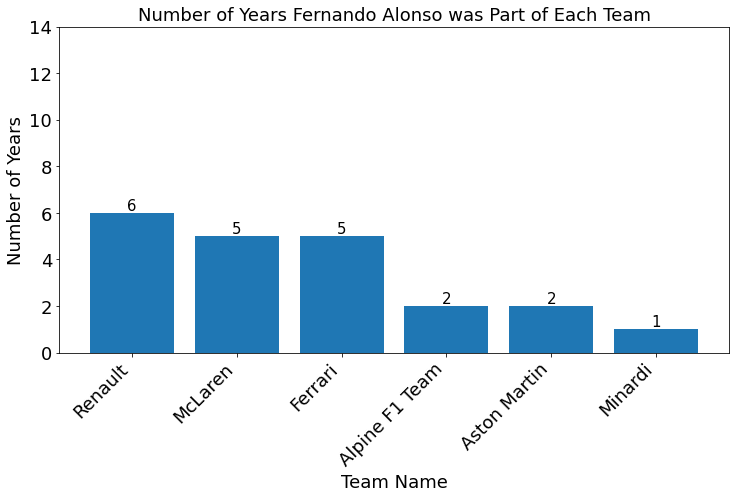

In [56]:
# Count of the number of years Fernando Alonso was part of a team

fer = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Fernando Alonso'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(fer['Team_Name'], fer['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Fernando Alonso was Part of Each Team', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [57]:
# Different Teams Nico Hülkenberg was part of during his career in reverse chronological order

nic = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Nico Hülkenberg'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
nic.index = pd.RangeIndex(start=1, stop=len(nic)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Nico Hülkenberg was part of during his career \n            (from Latest to Old)')

nic.head(1000)


 
        Name of the Constructor Teams 
 Nico Hülkenberg was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Haas F1 Team
2,2023,Haas F1 Team
3,2022,Aston Martin
4,2020,Racing Point
5,2019,Renault
6,2018,Renault
7,2017,Renault
8,2016,Force India
9,2015,Force India
10,2014,Force India


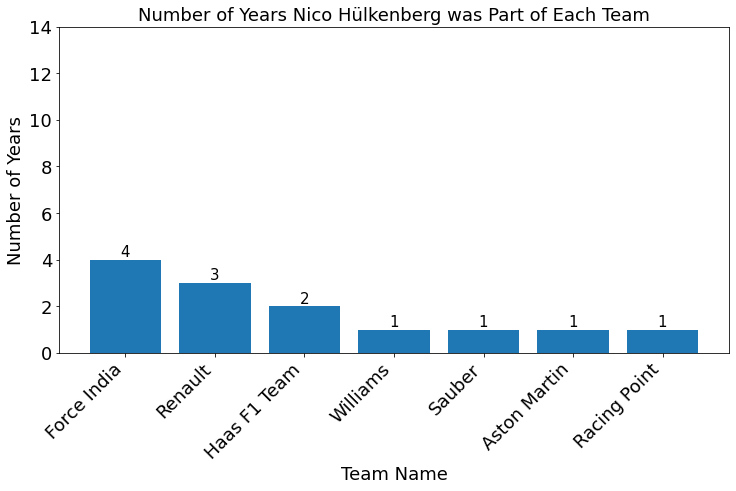

In [58]:
# Count of the number of years Nico Hülkenberg was part of a team

nic = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Nico Hülkenberg'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(nic['Team_Name'], nic['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Nico Hülkenberg was Part of Each Team', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [59]:
# Different Teams Lance Stroll was part of during his career in reverse chronological order

lanc = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lance Stroll'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
lanc.index = pd.RangeIndex(start=1, stop=len(lanc)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Lance Stroll was part of during his career \n            (from Latest to Old)')

lanc.head(1000)


 
        Name of the Constructor Teams 
 Lance Stroll was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Aston Martin
2,2023,Aston Martin
3,2022,Aston Martin
4,2021,Aston Martin
5,2020,Racing Point
6,2019,Racing Point
7,2018,Williams
8,2017,Williams


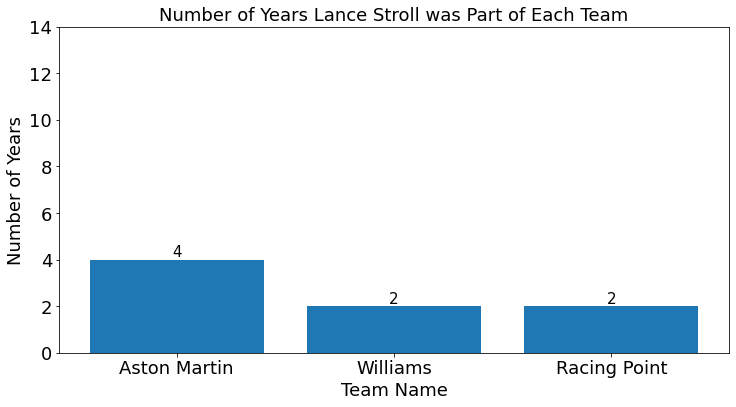

In [60]:
# Count of the number of years Lance Stroll was part of a team

lanc = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Lance Stroll'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(lanc['Team_Name'], lanc['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Lance Stroll was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [61]:
# Different Teams Yuki Tsunoda was part of during his career in reverse chronological order

yuk = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Yuki Tsunoda'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
yuk.index = pd.RangeIndex(start=1, stop=len(yuk)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Yuki Tsunoda was part of during his career \n            (from Latest to Old)')

yuk.head(1000)


 
        Name of the Constructor Teams 
 Yuki Tsunoda was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,RB F1 Team
2,2023,AlphaTauri
3,2022,AlphaTauri
4,2021,AlphaTauri


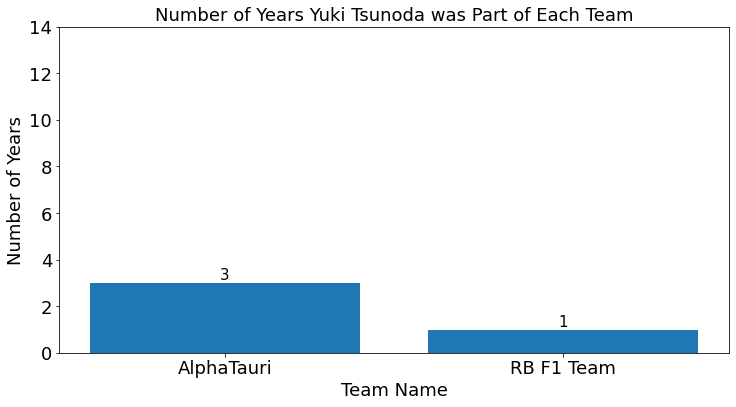

In [62]:
# Count of the number of years Yuki Tsunoda was part of a team

yuk = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Yuki Tsunoda'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(yuk['Team_Name'], yuk['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Yuki Tsunoda was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [63]:
# Different Teams Alexander Albon was part of during his career in reverse chronological order

alb = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Alexander Albon'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
alb.index = pd.RangeIndex(start=1, stop=len(alb)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Alexander Albon was part of during his career \n            (from Latest to Old)')

alb.head(1000)


 
        Name of the Constructor Teams 
 Alexander Albon was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Williams
2,2023,Williams
3,2022,Williams
4,2020,Red Bull
5,2019,Toro Rosso
6,2019,Red Bull


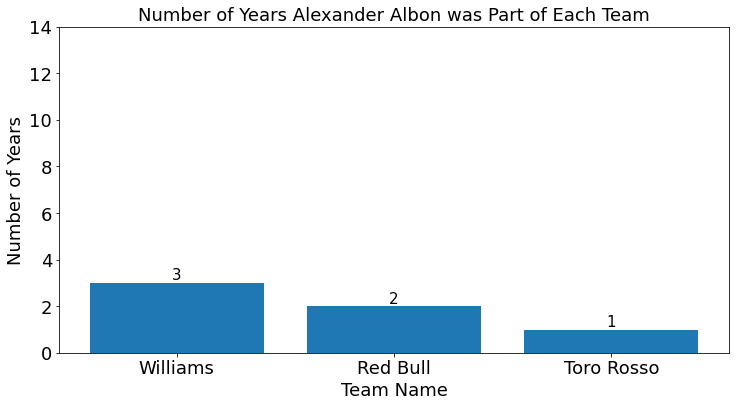

In [64]:
# Count of the number of years Alexander Albon was part of a team

alb = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Alexander Albon'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(alb['Team_Name'], alb['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Alexander Albon was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [65]:
# Different Teams Daniel Ricciardo was part of during his career in reverse chronological order

ric = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Daniel Ricciardo'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
ric.index = pd.RangeIndex(start=1, stop=len(ric)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Daniel Ricciardo was part of during his career \n            (from Latest to Old)')

ric.head(1000)


 
        Name of the Constructor Teams 
 Daniel Ricciardo was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,RB F1 Team
2,2023,AlphaTauri
3,2022,McLaren
4,2021,McLaren
5,2020,Renault
6,2019,Renault
7,2018,Red Bull
8,2017,Red Bull
9,2016,Red Bull
10,2015,Red Bull


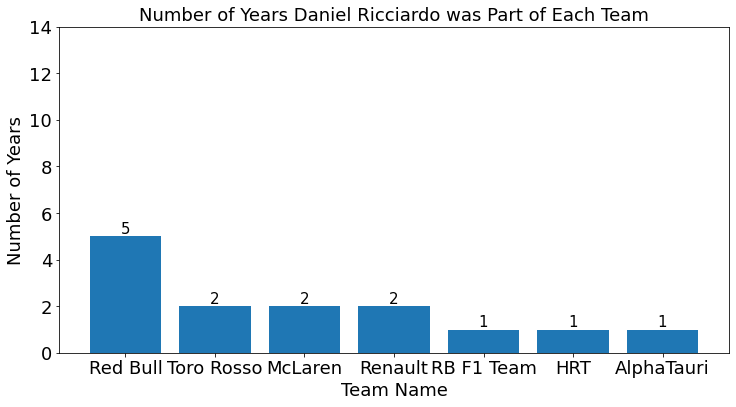

In [66]:
# Count of the number of years Daniel Ricciardo was part of a team

ric = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Daniel Ricciardo'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(ric['Team_Name'], ric['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Daniel Ricciardo was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [67]:
# Different Teams Pierre Gasly was part of during his career in reverse chronological order

gas = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Pierre Gasly'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
gas.index = pd.RangeIndex(start=1, stop=len(gas)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Pierre Gasly was part of during his career \n            (from Latest to Old)')

gas.head(1000)


 
        Name of the Constructor Teams 
 Pierre Gasly was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Alpine F1 Team
2,2023,Alpine F1 Team
3,2022,AlphaTauri
4,2021,AlphaTauri
5,2020,AlphaTauri
6,2019,Toro Rosso
7,2019,Red Bull
8,2018,Toro Rosso
9,2017,Toro Rosso


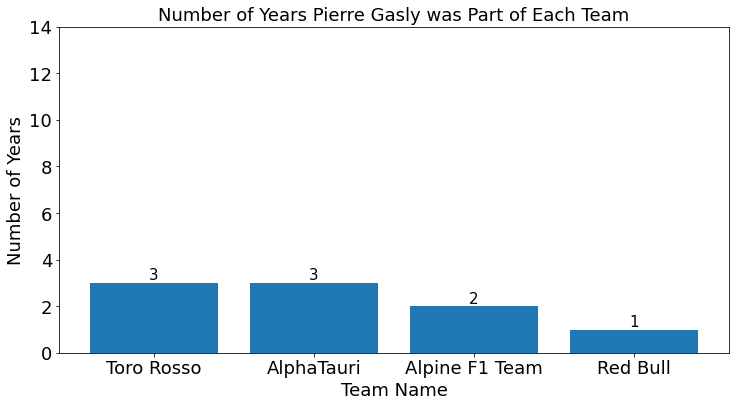

In [68]:
# Count of the number of years Pierre Gasly was part of a team

gas = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Pierre Gasly'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(gas['Team_Name'], gas['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Pierre Gasly was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [69]:
# Different Teams Valtteri Bottas was part of during his career in reverse chronological order

bot = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Valtteri Bottas'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
bot.index = pd.RangeIndex(start=1, stop=len(bot)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Valtteri Bottas was part of during his career \n            (from Latest to Old)')

bot.head(1000)


 
        Name of the Constructor Teams 
 Valtteri Bottas was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Sauber
2,2023,Alfa Romeo
3,2022,Alfa Romeo
4,2021,Mercedes
5,2020,Mercedes
6,2019,Mercedes
7,2018,Mercedes
8,2017,Mercedes
9,2016,Williams
10,2015,Williams


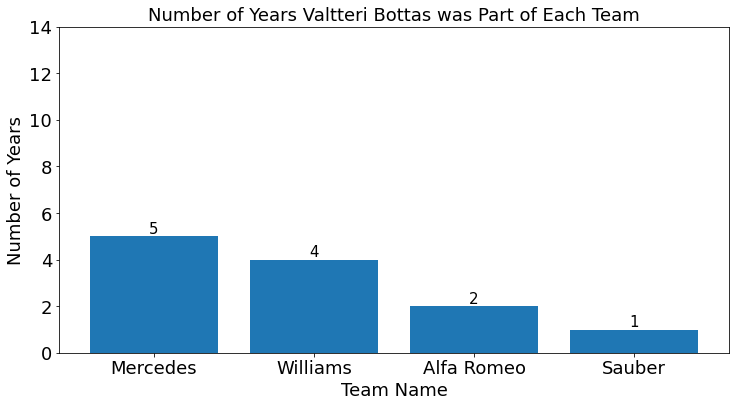

In [70]:
# Count of the number of years Valtteri Bottas was part of a team

bot = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Valtteri Bottas'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(bot['Team_Name'], bot['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Valtteri Bottas was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [71]:
# Different Teams Kevin Magnussen was part of during his career in reverse chronological order

kev = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Kevin Magnussen'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
kev.index = pd.RangeIndex(start=1, stop=len(kev)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Kevin Magnussen was part of during his career \n            (from Latest to Old)')

kev.head(1000)


 
        Name of the Constructor Teams 
 Kevin Magnussen was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Haas F1 Team
2,2023,Haas F1 Team
3,2022,Haas F1 Team
4,2020,Haas F1 Team
5,2019,Haas F1 Team
6,2018,Haas F1 Team
7,2017,Haas F1 Team
8,2016,Renault
9,2015,McLaren
10,2014,McLaren


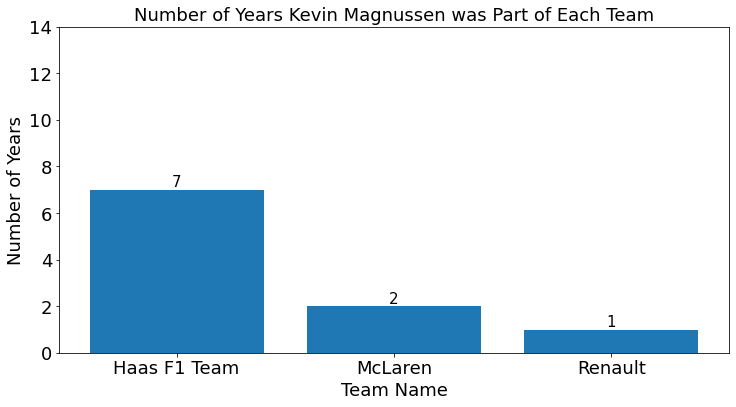

In [72]:
# Count of the number of years Kevin Magnussen was part of a team

kev = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Kevin Magnussen'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(kev['Team_Name'], kev['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Kevin Magnussen was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [73]:
# Different Teams Esteban Ocon was part of during his career in reverse chronological order

oco = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Esteban Ocon'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
oco.index = pd.RangeIndex(start=1, stop=len(oco)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Esteban Ocon was part of during his career \n            (from Latest to Old)')

oco.head(1000)


 
        Name of the Constructor Teams 
 Esteban Ocon was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Alpine F1 Team
2,2023,Alpine F1 Team
3,2022,Alpine F1 Team
4,2021,Alpine F1 Team
5,2020,Renault
6,2018,Force India
7,2017,Force India
8,2016,Manor Marussia


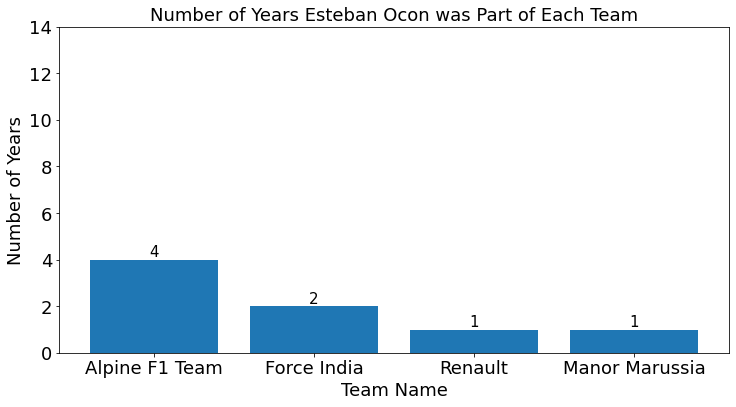

In [74]:
# Count of the number of years Esteban Ocon was part of a team

oco = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Esteban Ocon'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(oco['Team_Name'], oco['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Esteban Ocon was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [75]:
# Different Teams Guanyu Zhou was part of during his career in reverse chronological order

zho = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Guanyu Zhou'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
zho.index = pd.RangeIndex(start=1, stop=len(zho)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Guanyu Zhou was part of during his career \n            (from Latest to Old)')

zho.head(1000)


 
        Name of the Constructor Teams 
 Guanyu Zhou was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Sauber
2,2023,Alfa Romeo
3,2022,Alfa Romeo


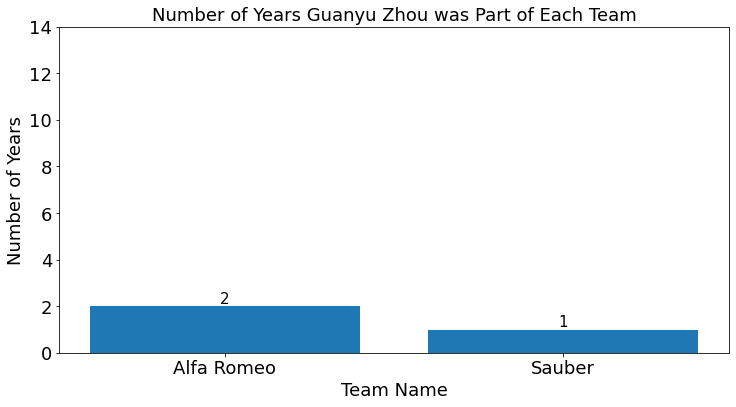

In [76]:
# Count of the number of years Guanyu Zhou was part of a team

zho = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Guanyu Zhou'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(zho['Team_Name'], zho['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Guanyu Zhou was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()


In [77]:
# Different Teams Logan Sargeant was part of during his career in reverse chronological order

sar = spark.sql("""SELECT DISTINCT s.year AS Year, c.name AS Team_Name
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Logan Sargeant'
                    ORDER BY Year DESC
                    """).toPandas()

# Reordering the index column to start from 1 instead of 0
sar.index = pd.RangeIndex(start=1, stop=len(sar)+1, step=1)

print('\n \n        Name of the Constructor Teams \n Logan Sargeant was part of during his career \n            (from Latest to Old)')

sar.head(1000)


 
        Name of the Constructor Teams 
 Logan Sargeant was part of during his career 
            (from Latest to Old)


,Year,Team_Name
1,2024,Williams
2,2023,Williams


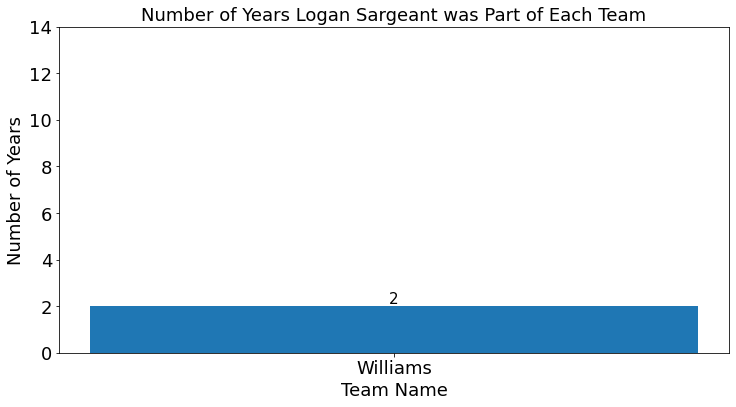

In [78]:
# Count of the number of years Logan Sargeant was part of a team

sar = spark.sql("""SELECT c.name AS Team_Name, COUNT(DISTINCT s.year) AS Number_of_Years
                    FROM drivers_sql d 
                    INNER JOIN results_sql r ON d.driverId = r.driverId
                    INNER JOIN races_sql s ON r.raceId = s.raceId
                    INNER JOIN cons_sql c ON r.constructorId = c.constructorId
                    WHERE CONCAT_WS(' ', d.forename, d.surname) = 'Logan Sargeant'
                    GROUP BY c.name
                    ORDER BY Number_of_Years DESC
                    """).toPandas()

plt.figure(figsize=(12,6))
bars = plt.bar(sar['Team_Name'], sar['Number_of_Years'])
plt.xlabel('Team Name', fontsize=18)
plt.ylabel('Number of Years', fontsize=18)
plt.title('Number of Years Logan Sargeant was Part of Each Team', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0, 14])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=15)
    
plt.show()
